# Josiah Gray: Exploratory Data Analysis and Predictability

Josiah Gray was the lone All-Star for my Washington Nationals in 2023. Overall, there was clear improvement in his 2023 performance versus his 2022 performance, and Gray was one of a couple of young players who I found myself attached to this season. Pitching is one of the most statistically complex aspects of the sport. There are an incredible amount of metrics to track pitching performance, and these days ERA and Win-Loss do not do a pitcher's performance justice. In this notebook I perform some exploratory data analysis and try to uncover any aspects of Josiah's game that could be improved without major tweaks. I also try to examine whether his pitching is predictable based on the handendess of the batter he faces, the count, the number of runners on base, and the count among other contextual factors.

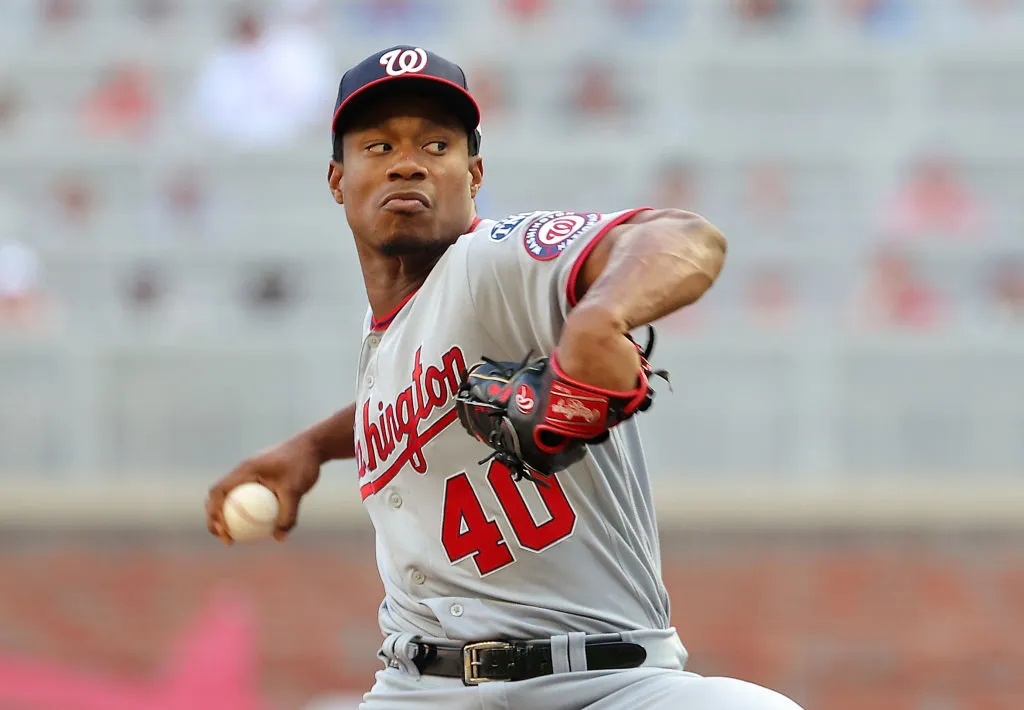

### Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import statsmodels.api as sm
import pybaseball
import datetime
%matplotlib inline

### Get Josiah Gray's statcast pitching data for 2023

In [2]:
id = pybaseball.playerid_lookup("gray", "josiah")["key_mlbam"].loc[0]
jg_2023_pitch_data = pybaseball.statcast_pitcher("2023-04-01", "2023-09-30", id)

Gathering player lookup table. This may take a moment.
Gathering Player Data


### Inspect the dataframe and remove unneeded columns

In [3]:
jg_2023_pitch_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [4]:
jg_2023_pitch_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2023-09-26,88.3,-1.90,4.94,"Gray, Josiah",656775,680686,field_out,hit_into_play,NaN,NaN,NaN,NaN,13,Cedric Mullins flies out to shortstop CJ Abrams.,R,L,R,BAL,WSH,X,6.0,fly_ball,1,2,2023,-1.10,0.73,-1.20,2.01,NaN,NaN,543305.0,2,6,Bot,82.14,133.59,NaN,NaN,660688,NaN,NaN,3.957483,-128.533297,-2.564247,-12.975503,26.763627,-23.711795,3.28,1.50,198.0,79.2,56.0,88.0,1553.0,6.1,716434,680686,660688,642086,671277,545121,682928,666906,696285,657041,54.43,0.046,0.052,0.0,1.0,0.0,0.0,3.0,46,4,Changeup,1,0,1,0,0,1,1,0,Standard,Standard,237.0,-0.022,-0.173
1,CU,2023-09-26,83.1,-1.84,5.07,"Gray, Josiah",656775,680686,NaN,swinging_strike_blocked,NaN,NaN,NaN,NaN,14,Cedric Mullins flies out to shortstop CJ Abrams.,R,L,R,BAL,WSH,S,NaN,NaN,1,1,2023,0.09,-0.26,0.75,0.64,NaN,NaN,543305.0,2,6,Bot,NaN,NaN,NaN,NaN,660688,NaN,NaN,5.678749,-120.906208,-3.113606,-0.334447,25.710331,-34.254890,3.28,1.50,NaN,NaN,NaN,81.9,2227.0,5.7,716434,680686,660688,642086,671277,545121,682928,666906,696285,657041,54.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,3,Curveball,1,0,1,0,0,1,1,0,Standard,Standard,42.0,0.000,-0.050
2,CH,2023-09-26,88.2,-1.81,4.94,"Gray, Josiah",656775,680686,NaN,ball,NaN,NaN,NaN,NaN,13,Cedric Mullins flies out to shortstop CJ Abrams.,R,L,R,BAL,WSH,B,NaN,NaN,0,1,2023,-1.16,1.04,-1.57,1.19,NaN,NaN,543305.0,2,6,Bot,NaN,NaN,NaN,NaN,660688,NaN,NaN,2.973874,-128.248080,-5.083148,-13.338098,29.438073,-19.805269,3.28,1.45,NaN,NaN,NaN,87.3,1605.0,6.0,716434,680686,660688,642086,671277,545121,682928,666906,696285,657041,54.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,2,Changeup,1,0,1,0,0,1,1,0,Standard,Standard,233.0,0.000,0.021
3,SI,2023-09-26,94.4,-1.85,5.00,"Gray, Josiah",656775,680686,NaN,foul,NaN,NaN,NaN,NaN,5,Cedric Mullins flies out to shortstop CJ Abrams.,R,L,R,BAL,WSH,S,NaN,NaN,0,0,2023,-1.17,1.26,-0.15,2.67,NaN,NaN,543305.0,2,6,Bot,NaN,NaN,NaN,NaN,660688,NaN,NaN,6.994298,-137.291061,-3.124353,-16.401368,32.818869,-15.766717,3.28,1.50,172.0,77.8,15.0,93.5,2284.0,6.0,716434,680686,660688,642086,671277,545121,682928,666906,696285,657041,54.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,1,Sinker,1,0,1,0,0,1,1,0,Standard,Standard,222.0,0.000,-0.038
4,FC,2023-09-26,87.1,-1.97,5.11,"Gray, Josiah",543305,680686,walk,ball,NaN,NaN,NaN,NaN,11,Aaron Hicks walks.,R,L,R,BAL,WSH,B,NaN,NaN,3,0,2023,-0.28,0.58,-1.55,3.05,NaN,NaN,NaN,2,6,Bot,NaN,NaN,NaN,NaN,660688,NaN,NaN,1.570428,-126.811702,0.012588,-3.330647,26.335099,-26.124063,3.64,1.71,NaN,NaN,NaN,86.4,1858.0,5.8,716434,680686,660688,642086,671277,545121,682928,666906,696285,657041,54.68,NaN,NaN,0.7,1.0,0.0,0.0,NaN,45,4,Cutter,1,0,1,0,0,1,1,0,Infield shade,Strategic,207.0,0.012,0.052


In [5]:
jg_2023_pitch_data = jg_2023_pitch_data.drop(['game_date', 'player_name', 'batter', 'pitcher', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'des',
       'game_type', 'game_year',  'inning_topbot', 'p_throws', 'home_team', 'away_team',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'pitch_number', 'pitch_name',
       'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score',
       'if_fielding_alignment', 'of_fielding_alignment',
       'delta_home_win_exp', 'delta_run_exp'], axis=1)

In [6]:
jg_2023_pitch_data.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,events,description,zone,stand,type,hit_location,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,at_bat_number,spin_axis
0,CH,88.3,-1.90,4.94,field_out,hit_into_play,13,L,X,6.0,fly_ball,1,2,-1.10,0.73,-1.20,2.01,NaN,NaN,543305.0,2,6,82.14,133.59,3.957483,-128.533297,-2.564247,-12.975503,26.763627,-23.711795,3.28,1.50,198.0,79.2,56.0,88.0,1553.0,6.1,46,237.0
1,CU,83.1,-1.84,5.07,NaN,swinging_strike_blocked,14,L,S,NaN,NaN,1,1,0.09,-0.26,0.75,0.64,NaN,NaN,543305.0,2,6,NaN,NaN,5.678749,-120.906208,-3.113606,-0.334447,25.710331,-34.254890,3.28,1.50,NaN,NaN,NaN,81.9,2227.0,5.7,46,42.0
2,CH,88.2,-1.81,4.94,NaN,ball,13,L,B,NaN,NaN,0,1,-1.16,1.04,-1.57,1.19,NaN,NaN,543305.0,2,6,NaN,NaN,2.973874,-128.248080,-5.083148,-13.338098,29.438073,-19.805269,3.28,1.45,NaN,NaN,NaN,87.3,1605.0,6.0,46,233.0
3,SI,94.4,-1.85,5.00,NaN,foul,5,L,S,NaN,NaN,0,0,-1.17,1.26,-0.15,2.67,NaN,NaN,543305.0,2,6,NaN,NaN,6.994298,-137.291061,-3.124353,-16.401368,32.818869,-15.766717,3.28,1.50,172.0,77.8,15.0,93.5,2284.0,6.0,46,222.0
4,FC,87.1,-1.97,5.11,walk,ball,11,L,B,NaN,NaN,3,0,-0.28,0.58,-1.55,3.05,NaN,NaN,NaN,2,6,NaN,NaN,1.570428,-126.811702,0.012588,-3.330647,26.335099,-26.124063,3.64,1.71,NaN,NaN,NaN,86.4,1858.0,5.8,45,207.0


### Create count variable

In [7]:
jg_2023_pitch_data["count"] = jg_2023_pitch_data.apply(lambda row: f"{row.balls}-{row.strikes}", axis=1)

### Replace blocked_ball values with ball

In [8]:
jg_2023_pitch_data[jg_2023_pitch_data["description"] == "blocked_ball"]["type"].value_counts()

B    64
Name: type, dtype: int64

In [9]:
jg_2023_pitch_data["description"].replace("blocked_ball", "ball", inplace=True)

### Inspect event and description columns

In [10]:
jg_2023_pitch_data.events.value_counts()

field_out                     279
strikeout                     142
single                        100
walk                           79
double                         29
home_run                       22
force_out                      14
grounded_into_double_play      13
hit_by_pitch                    9
sac_fly                         4
field_error                     2
strikeout_double_play           1
pickoff_1b                      1
double_play                     1
triple                          1
pickoff_caught_stealing_2b      1
fielders_choice                 1
Name: events, dtype: int64

In [11]:
jg_2023_pitch_data.description.value_counts()

ball                       1079
foul                        494
hit_into_play               466
called_strike               419
swinging_strike             300
foul_tip                     31
swinging_strike_blocked      10
hit_by_pitch                  9
foul_bunt                     3
missed_bunt                   1
Name: description, dtype: int64

### Convert pitch abbreviations into full names

In [12]:
jg_2023_pitch_data.pitch_type.value_counts()

SL    693
FC    500
SI    483
FF    479
CU    456
ST    156
CH     45
Name: pitch_type, dtype: int64

In [13]:
pitch_map = {"SL": "Slider", "FC": "Cutter", "SI": "Sinker", "FF": "Fastball", "CU": "Curveball", "ST": "Sweeper", "CH": "Changeup"}
jg_2023_pitch_data["pitch_type"] = jg_2023_pitch_data["pitch_type"].replace(pitch_map)

### Plot of pitch distribution

<Axes: xlabel='pitch_type', ylabel='count'>

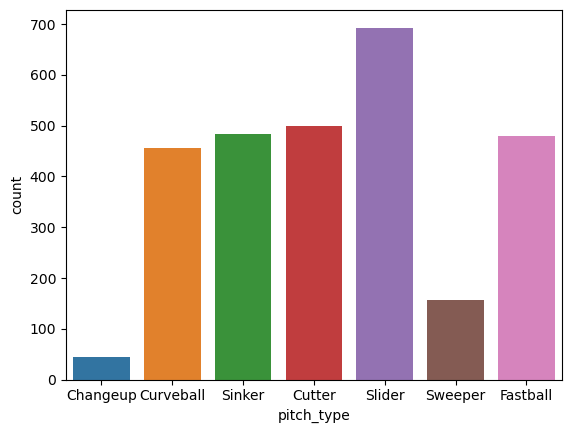

In [14]:
sns.countplot(data=jg_2023_pitch_data, x="pitch_type")

Josiah Gray does not seem to throw a lot of offspeed pitches. In 2023 around 13.2% of all pitches thrown were offspeed, whereas this figure for Gray was just 1.6%. On the surface it seems as if throwing the changeup more often would be a good idea. 

### Create pitch_group variable which groups every pitch into a fastball, breaking ball, or offspeed pitch

In [15]:
def find_pitch_group(row):
    if row in ["Fastball", "Cutter", "Sinker"]:
        return "Fastballs"
    elif row in ["Curveball", "Slider", "Sweeper"]:
        return "Breaking"
    else:
        return "Offspeed"
jg_2023_pitch_data["pitch_group"] = jg_2023_pitch_data["pitch_type"].apply(find_pitch_group)

### Plot the pitch locations per pitch type (vertical limits of strikezone are average approximation, horizontal is width of plate)

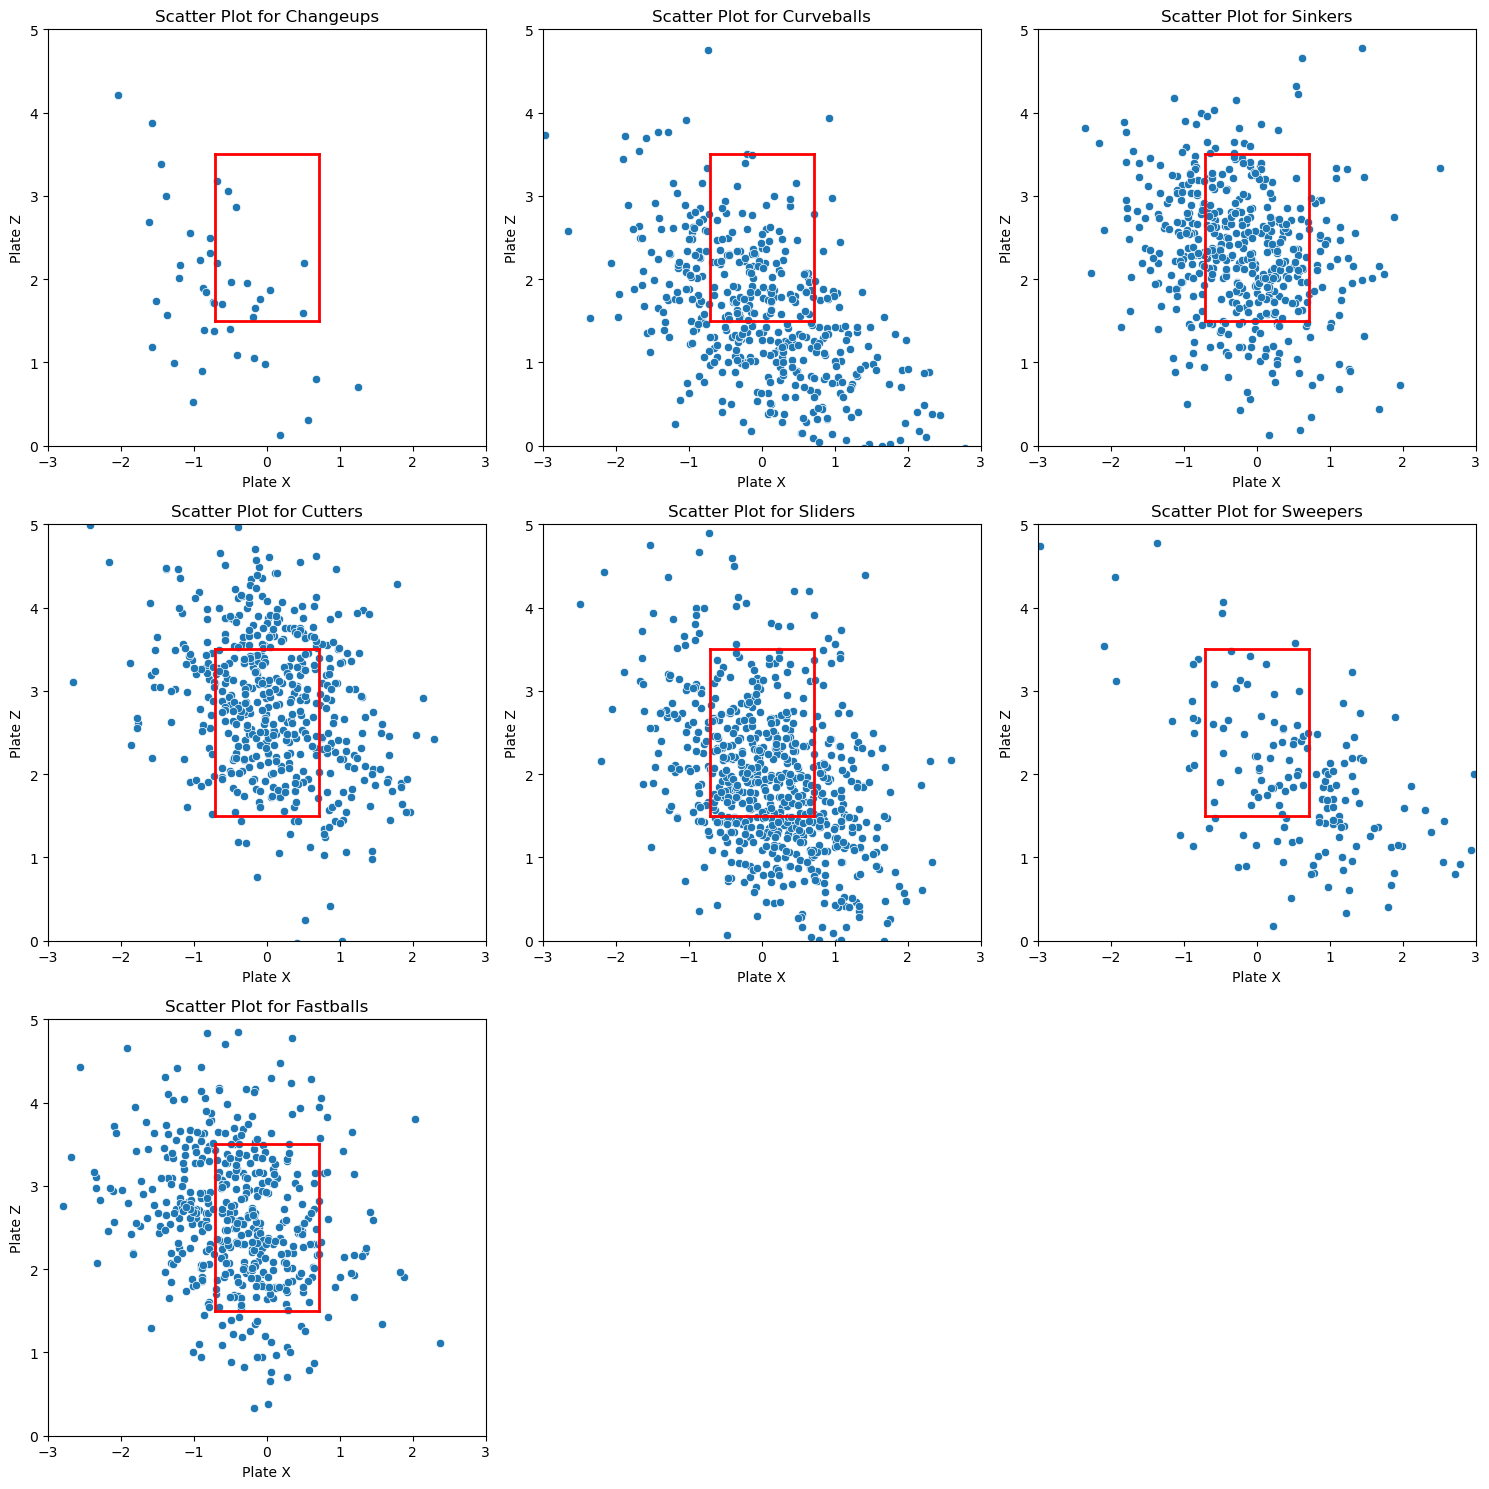

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, pitch_type in enumerate(jg_2023_pitch_data['pitch_type'].unique()):
    sns.scatterplot(data=jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch_type], x="plate_x", y="plate_z", ax=axes[i])
    axes[i].set_title(f"Scatter Plot for {pitch_type}s")
    axes[i].set_xlabel("Plate X")
    axes[i].set_ylabel("Plate Z")
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(0, 5)
    
for i in range(len(jg_2023_pitch_data['pitch_type'].unique()), 9):
    fig.delaxes(axes[i])

strike_zone_x_min = -0.71
strike_zone_x_max = 0.71
strike_zone_y_min = 1.5
strike_zone_y_max = 3.5

for ax in axes:
    ax.plot([strike_zone_x_min, strike_zone_x_max], [strike_zone_y_min, strike_zone_y_min], color='r', linestyle='-', linewidth=2)
    ax.plot([strike_zone_x_min, strike_zone_x_max], [strike_zone_y_max, strike_zone_y_max], color='r', linestyle='-', linewidth=2)
    ax.plot([strike_zone_x_min, strike_zone_x_min], [strike_zone_y_min, strike_zone_y_max], color='r', linestyle='-', linewidth=2)
    ax.plot([strike_zone_x_max, strike_zone_x_max], [strike_zone_y_min, strike_zone_y_max], color='r', linestyle='-', linewidth=2)

plt.tight_layout()

### Plot the pitches that resulted in home runs and specify the pitch type

(0.0, 5.0)

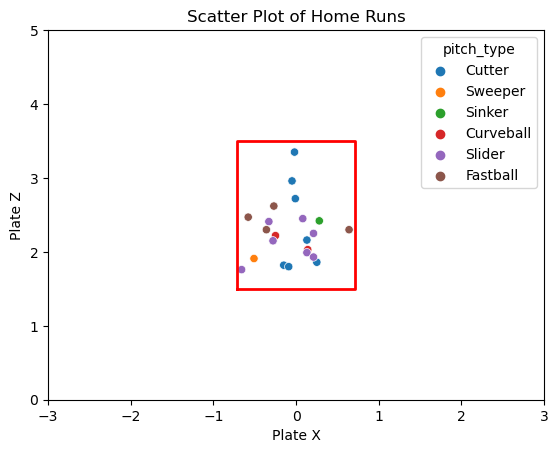

In [17]:
fig, ax = plt.subplots()
sns.scatterplot(data=jg_2023_pitch_data[jg_2023_pitch_data["events"] == "home_run"], x="plate_x", y="plate_z", ax=ax, hue="pitch_type")
ax.plot([strike_zone_x_min, strike_zone_x_max, strike_zone_x_max, strike_zone_x_min, strike_zone_x_min],
        [strike_zone_y_min, strike_zone_y_min, strike_zone_y_max, strike_zone_y_max, strike_zone_y_min],
        color='r', linestyle='-', linewidth=2)

ax.set_xlabel("Plate X")
ax.set_ylabel("Plate Z")
ax.set_title("Scatter Plot of Home Runs")
ax.set_xlim(-3 ,3)
ax.set_ylim(0, 5)

# Inspect correlations between horizontal and vertical release points and spin rate/speed for each pitch type

### Plot spin rate vs release position z

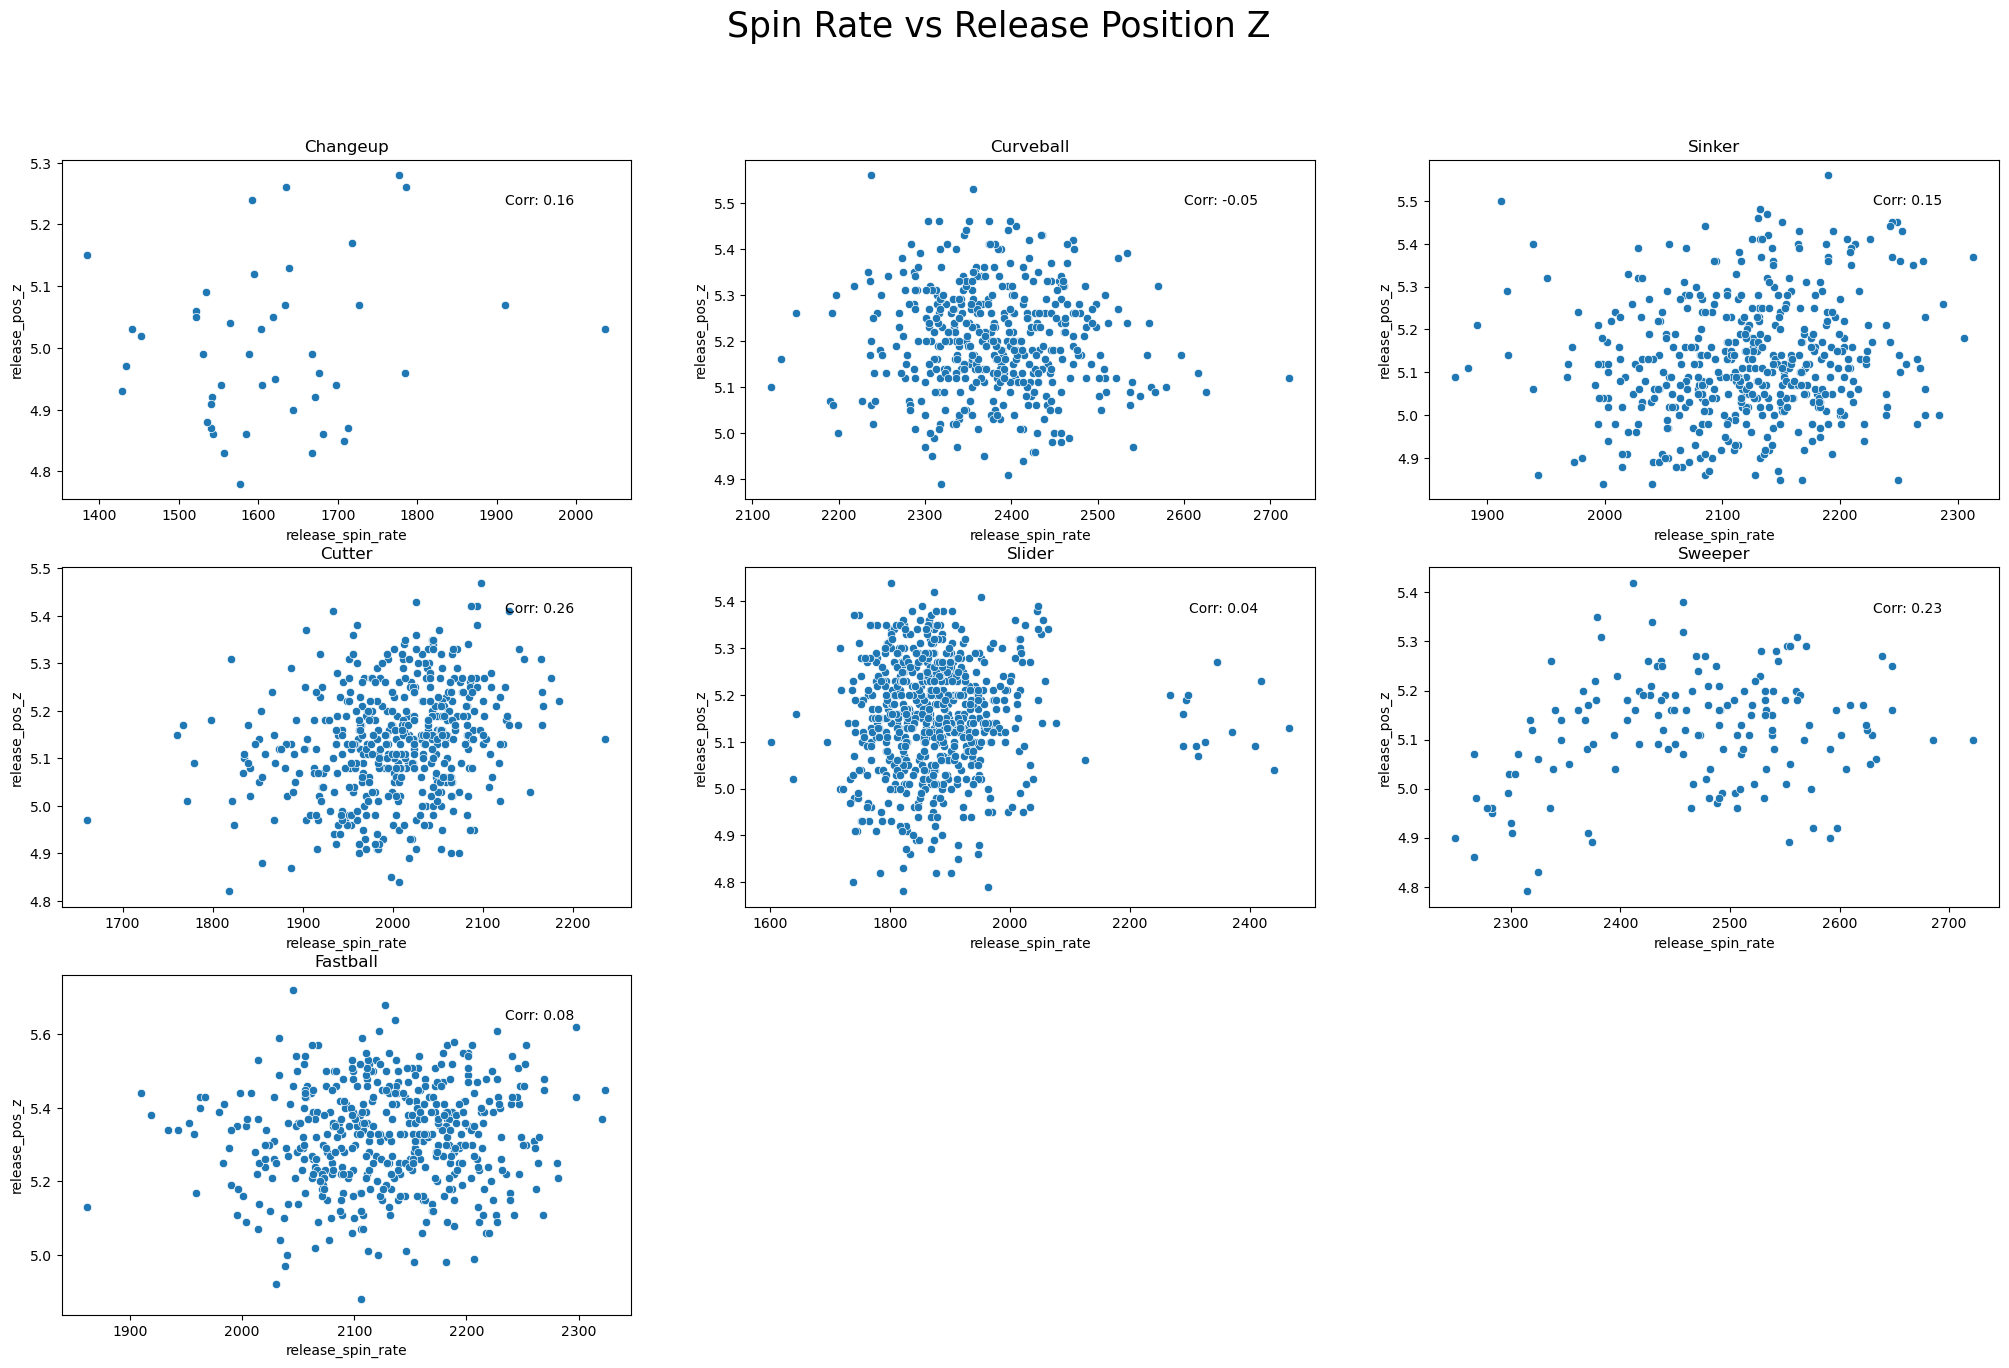

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
pitch_type_list = jg_2023_pitch_data['pitch_type'].unique().tolist()
fig.suptitle("Spin Rate vs Release Position Z", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_spin_rate", y="release_pos_z", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_spin_rate'].corr(pitch_data['release_pos_z'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

The plots show that release position z does not necessarily have a significant impact on the release spin rate of a pitch. Release position z refers to the vertical release position of the ball measured in feet from the catcher's perspective.

### Plot spin rate vs release position x

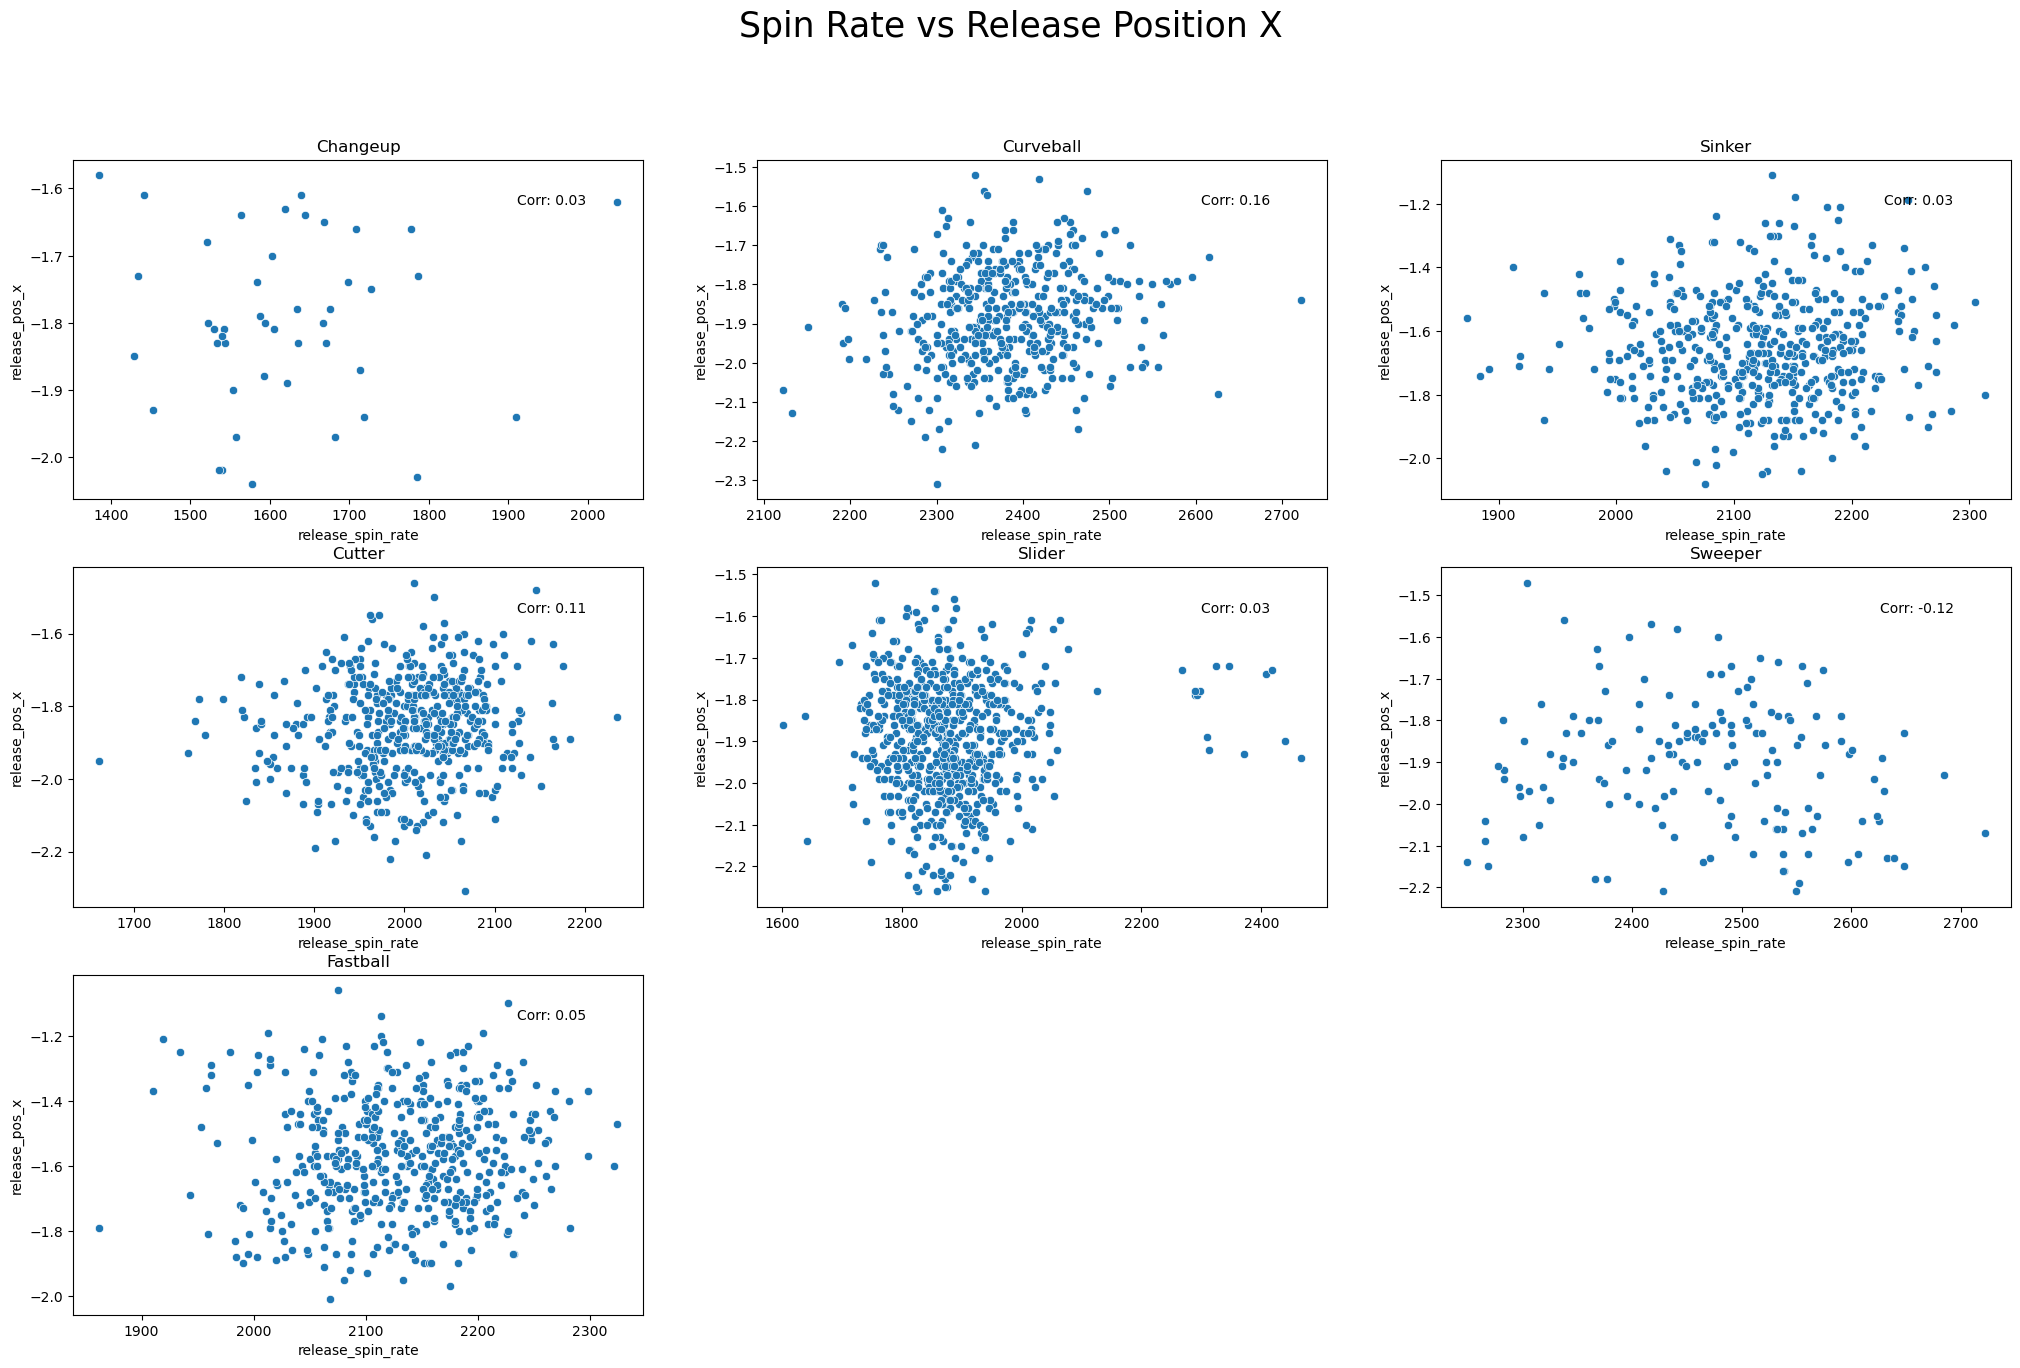

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
fig.suptitle("Spin Rate vs Release Position X", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_spin_rate", y="release_pos_x", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_spin_rate'].corr(pitch_data['release_pos_x'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

The plots show that release position x does not necessarily have a significant impact on the release spin rate of a pitch either. Release position x refers to the horizontal release position of the ball measured in feet from the catcher's perspective.

### Plot release speed vs release position x

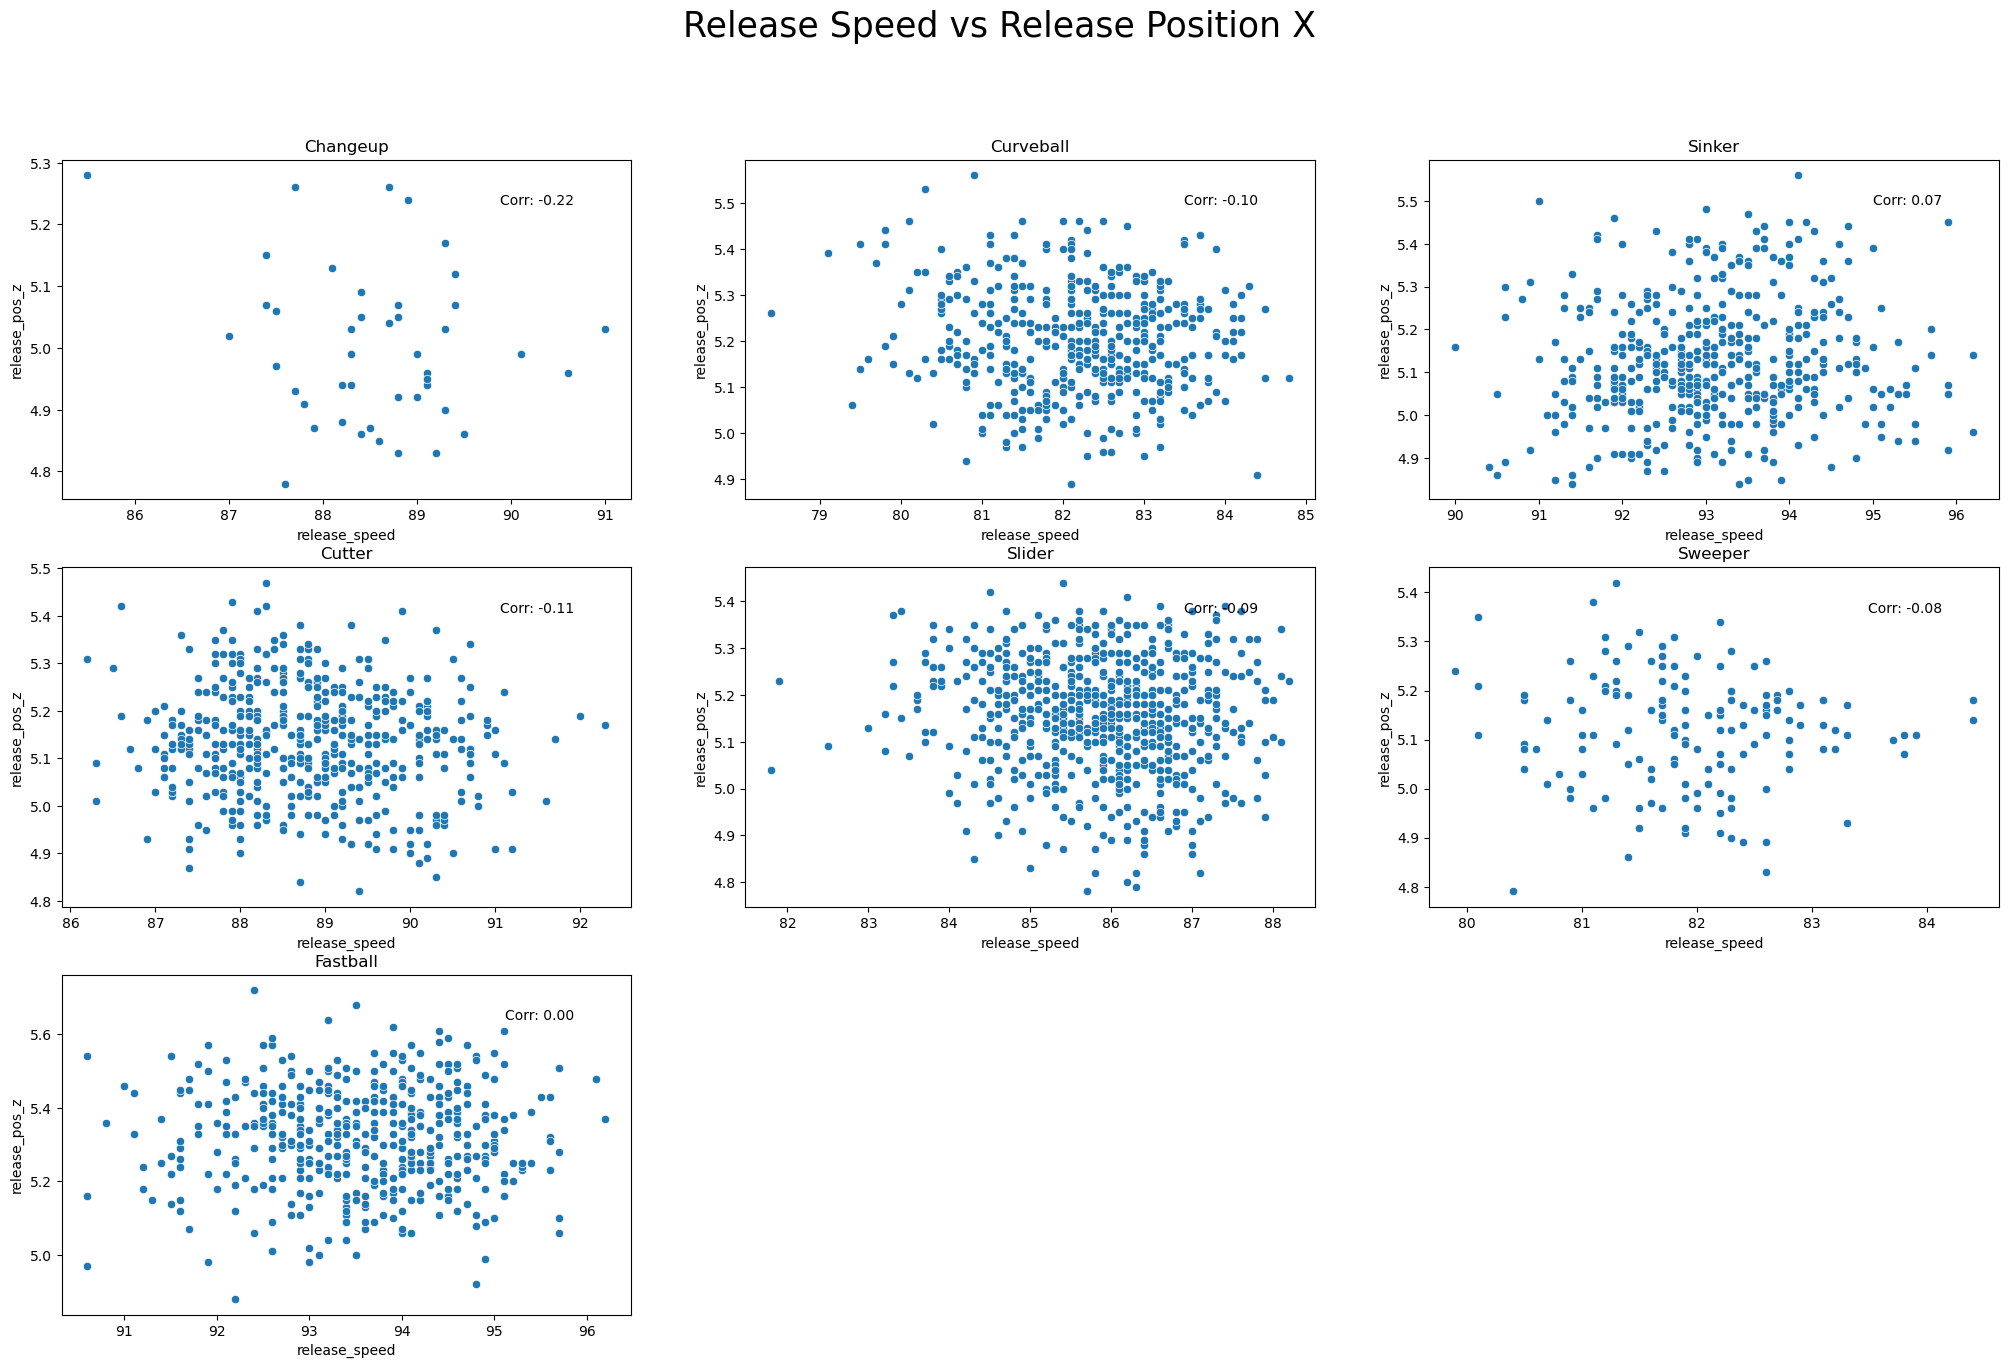

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
fig.suptitle("Release Speed vs Release Position X", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_speed", y="release_pos_z", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_speed'].corr(pitch_data['release_pos_z'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

### Plot release speed vs release position x

Again, the plots show that release position x does not necessarily have a significant impact on the release speed of a pitch.

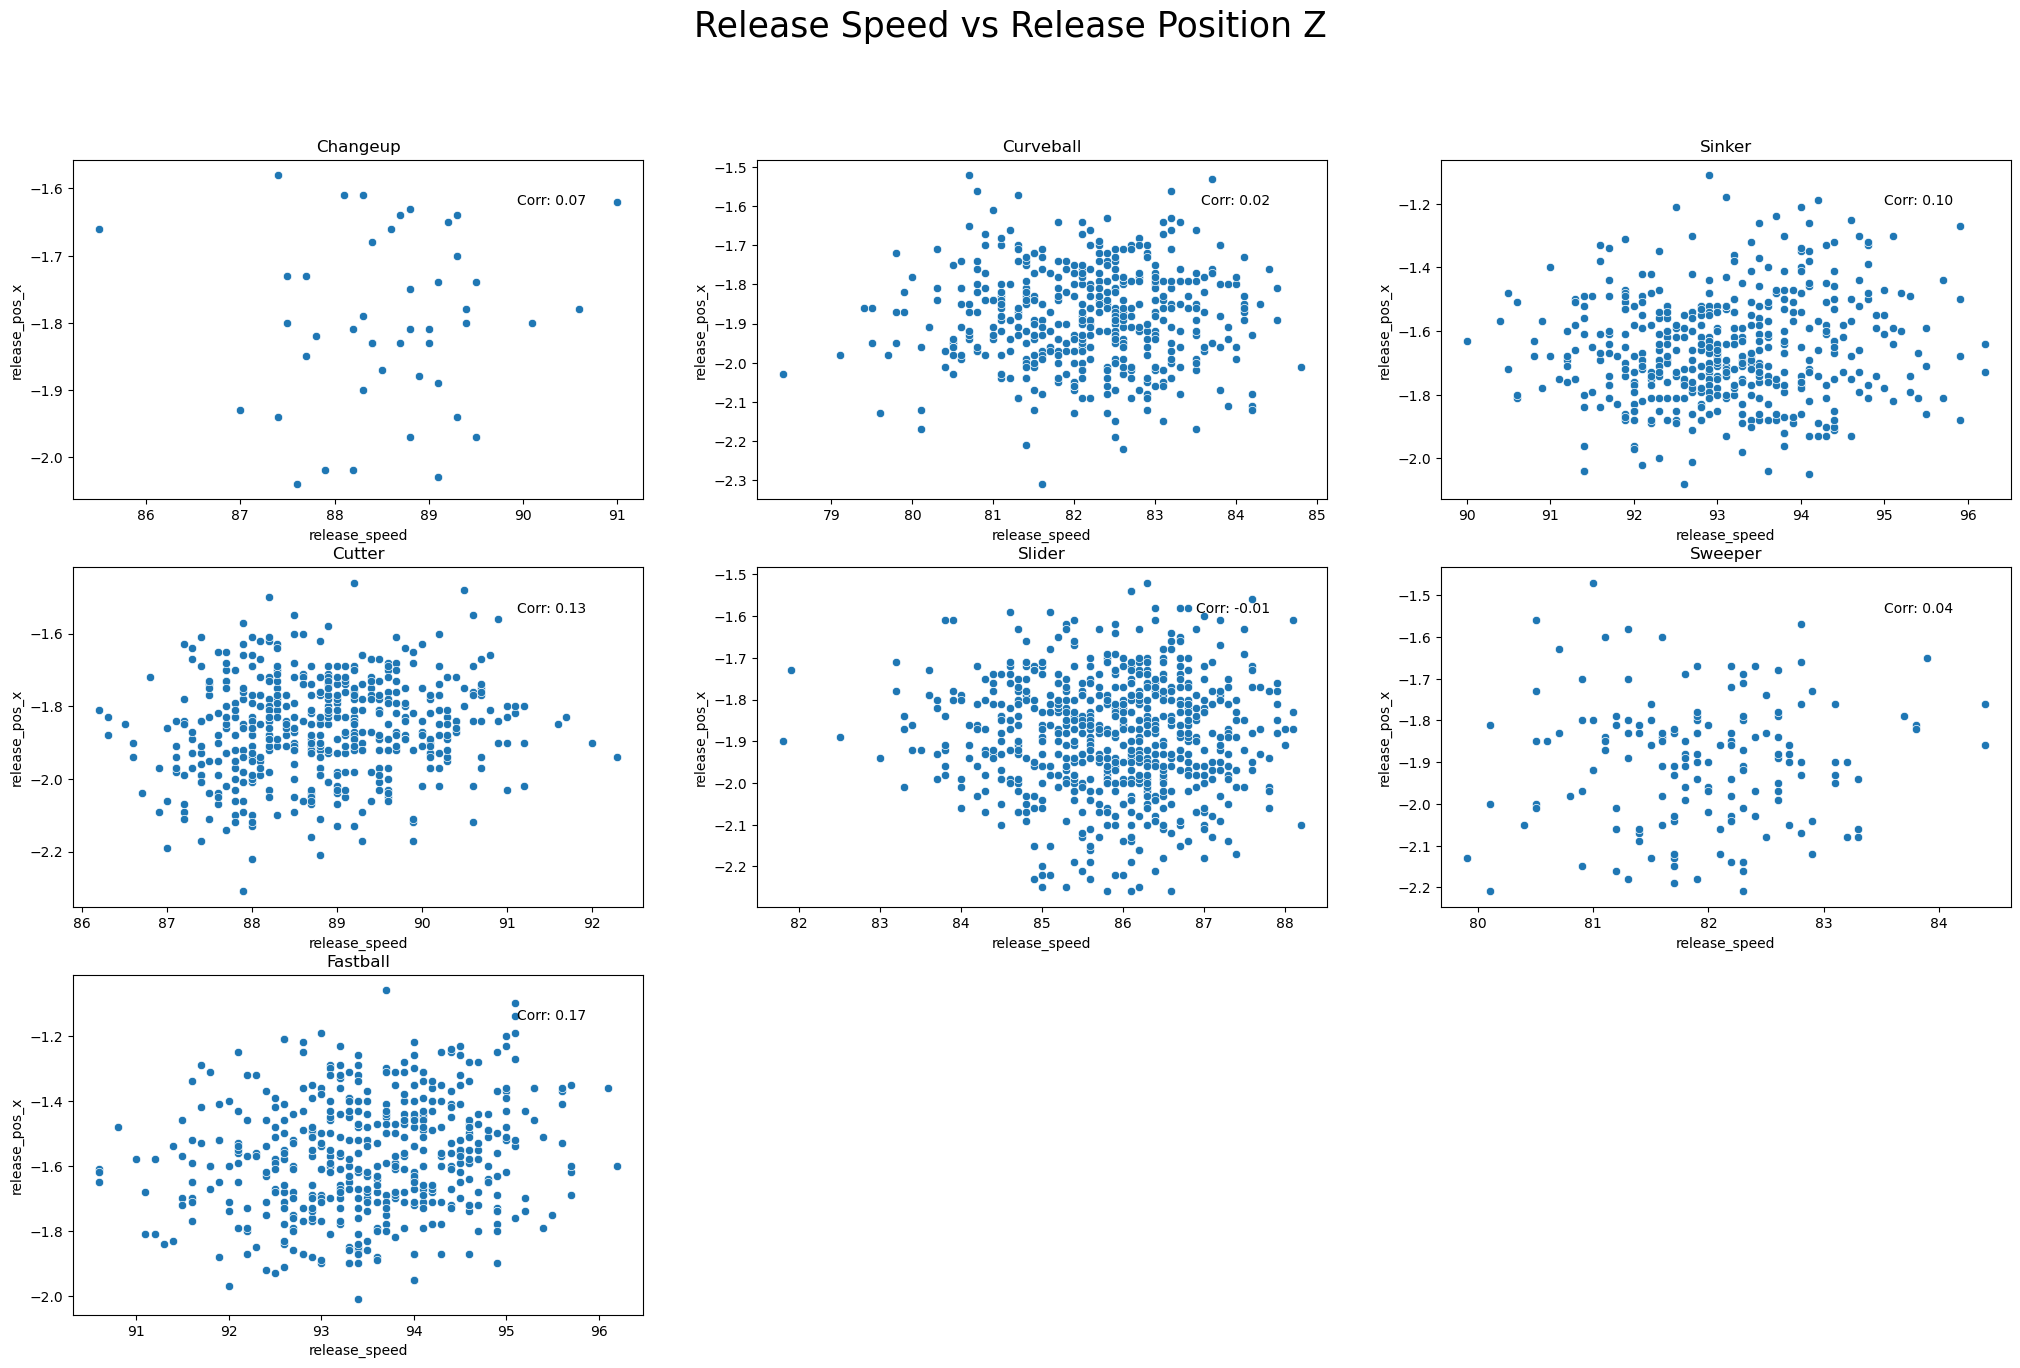

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
fig.suptitle("Release Speed vs Release Position Z", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_speed", y="release_pos_x", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_speed'].corr(pitch_data['release_pos_x'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

The plots show that release position z does not necessarily have a significant impact on the release speed of a pitch.

### Plot release speed vs release extension

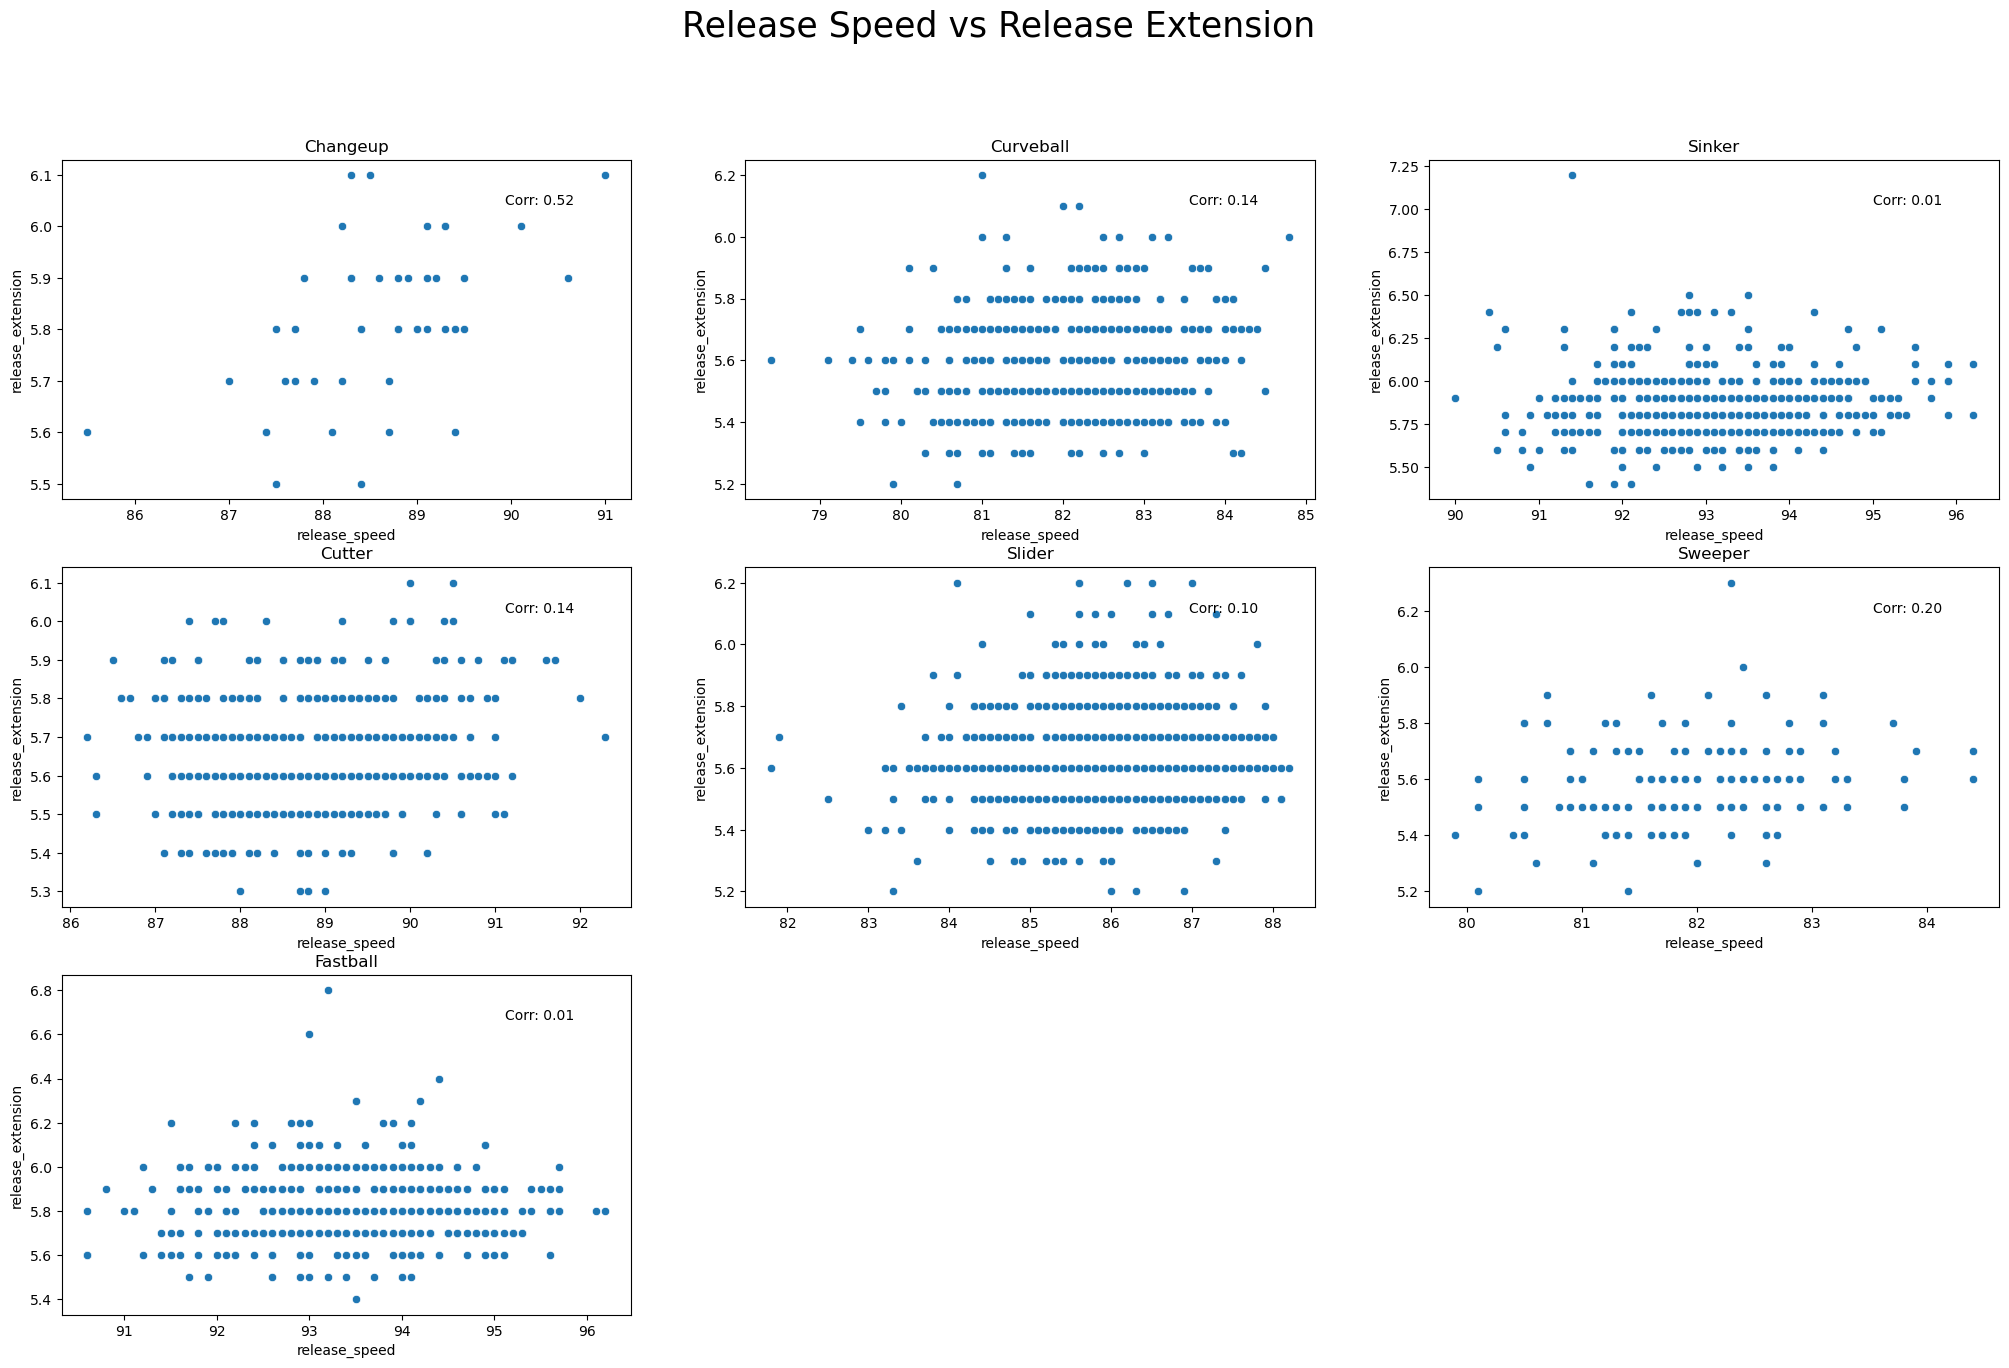

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
fig.suptitle("Release Speed vs Release Extension", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_speed", y="release_extension", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_speed'].corr(pitch_data['release_extension'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

Release extension does not seem to impact release speed. Release Extension is defined by the distance from the front of the rubber to where the pitcher releases the baseball.

### Plot release spin rate vs release extension

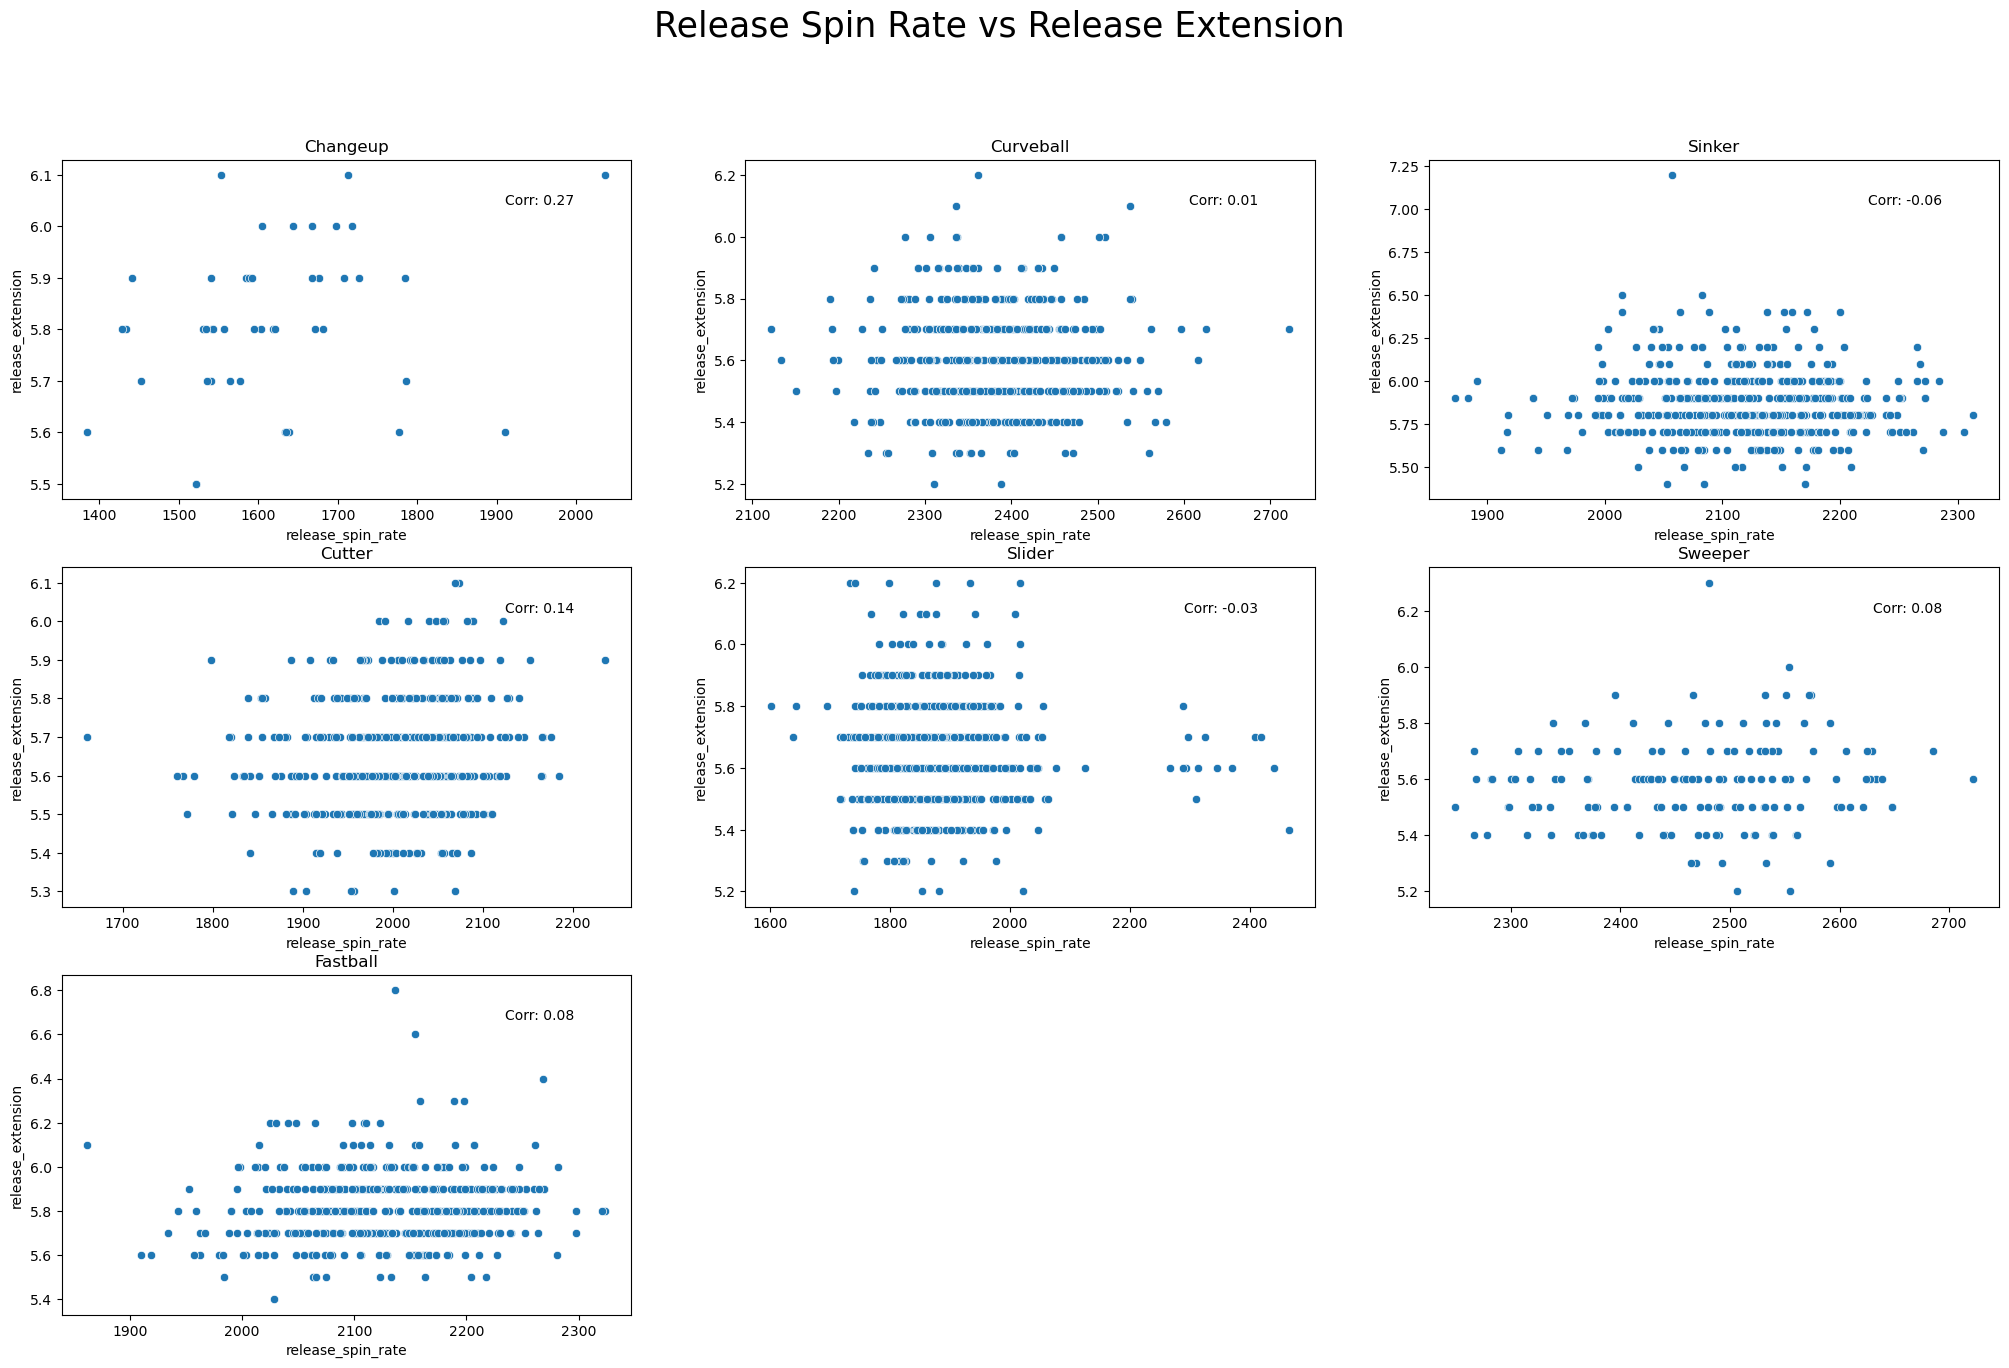

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
pitch_type_list = jg_2023_pitch_data['pitch_type'].unique().tolist()
fig.suptitle("Release Spin Rate vs Release Extension", fontsize=25)

for i, pitch in enumerate(pitch_type_list):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    pitch_data = jg_2023_pitch_data[jg_2023_pitch_data['pitch_type'] == pitch]

    sns.scatterplot(data=pitch_data, x="release_spin_rate", y="release_extension", ax=ax)
    ax.set_title(f"{pitch}")

    correlation = pitch_data['release_spin_rate'].corr(pitch_data['release_extension'])

    ax.text(0.9, 0.9, f"Corr: {correlation:.2f}", transform=ax.transAxes, ha='right', va='top')

for i in range(len(pitch_type_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

Again no significant relationship. From the section as a whole it seems as if there is no specific delivery tweak that can help in maximizing his velocity and spin rate.

#### Plot the average release speed for each pitch

(75.0, 100.0)

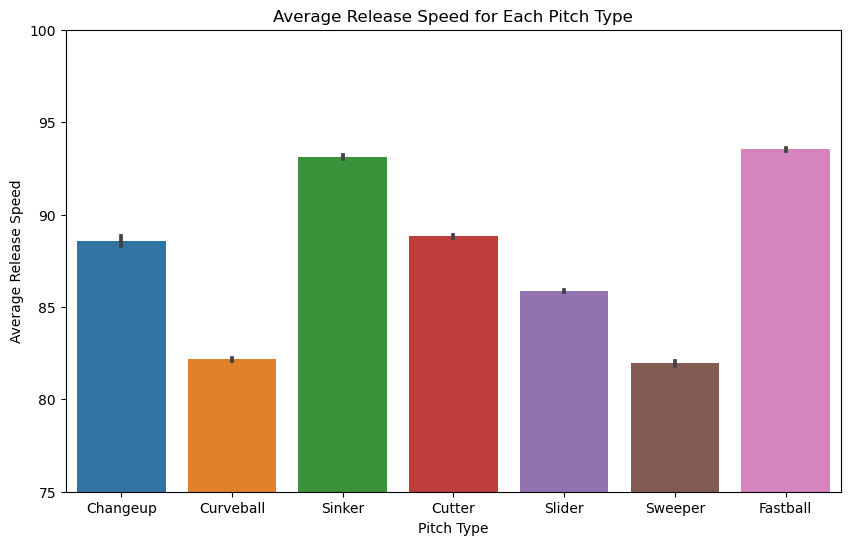

In [24]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=jg_2023_pitch_data, x="pitch_type", y="release_speed", estimator="mean")
plt.xlabel('Pitch Type')
plt.ylabel('Average Release Speed')
plt.title('Average Release Speed for Each Pitch Type')
ax.set_ylim(75, 100)

## Pitches by batter handedness

#### Rather even distribution in terms of LHB and RHB faced

In [25]:
jg_2023_pitch_data.stand.value_counts()

L    1445
R    1367
Name: stand, dtype: int64

#### Plot pitch frequency per batter handedness

Text(0.5, 1.0, 'Pitch Frequency per Batter Handedness')

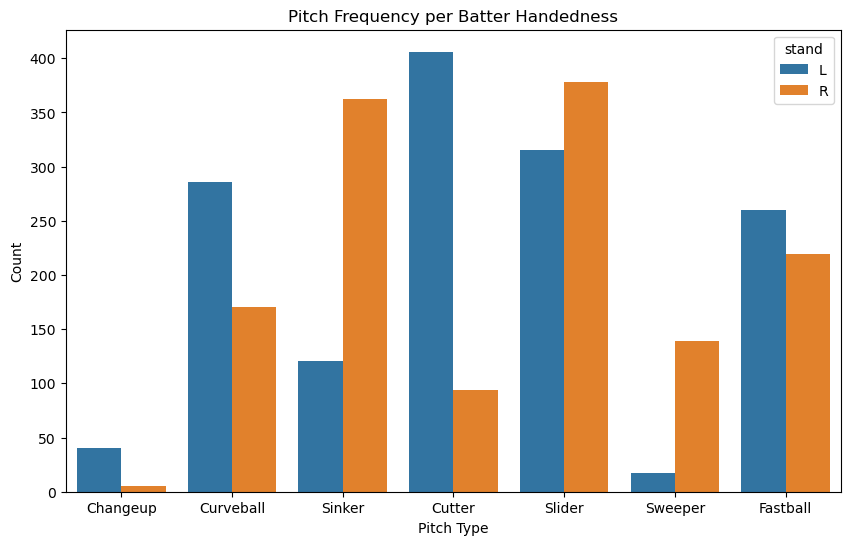

In [26]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.countplot(data=jg_2023_pitch_data, x="pitch_type", hue="stand")
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.title('Pitch Frequency per Batter Handedness')

There are some rather clear disparities in terms of the number of certain pitches thrown to left-handed batters versus right-handed batters. Josiah Gray throws his sinker a lot more often to RHB than to LHB, and the same can be said for his sweeper. His cutter exhibits the opposite, it is thrown substantially more often to LHB than to RHB. Below are the run values for each of his pitches. His cutter is clearly his strongest pitch, followed by his sweeper and his slider. His sinker and 4-seamer are relatively weak.

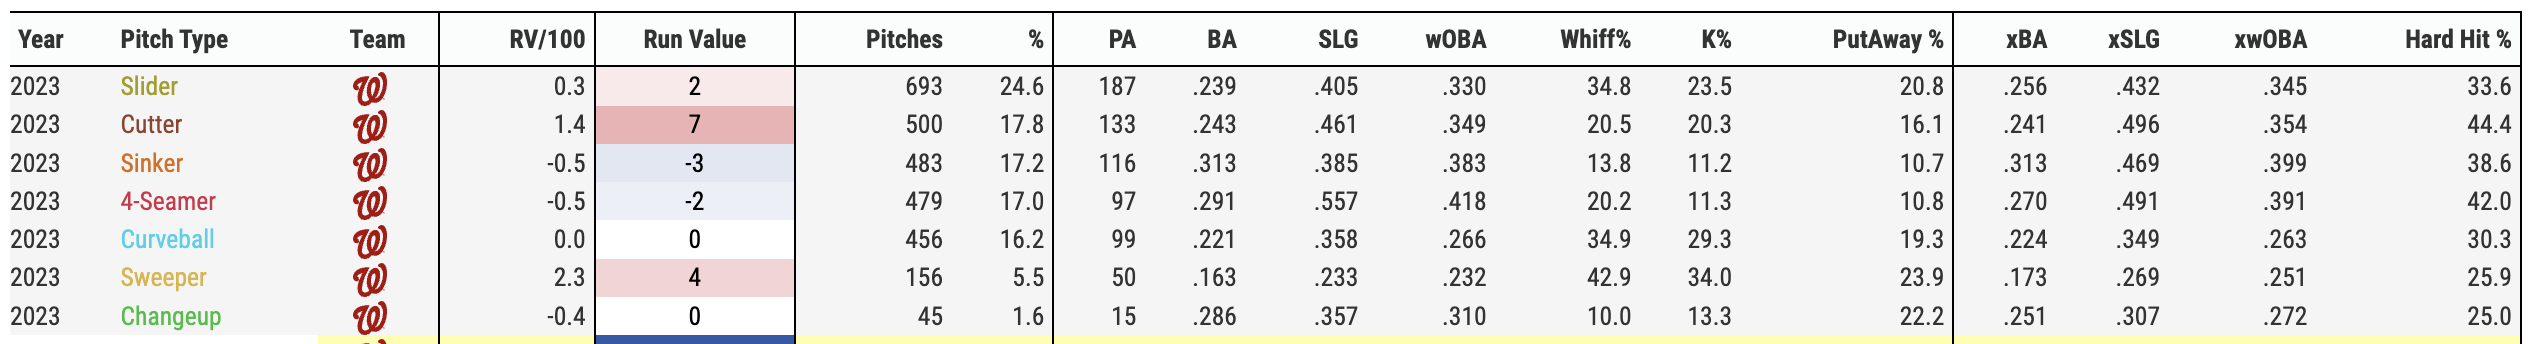

### Cutter performance by handedness

In [27]:
cutter_l = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "L") & (jg_2023_pitch_data["pitch_type"] == "Cutter")]
cutter_r = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "R") & (jg_2023_pitch_data["pitch_type"] == "Cutter")]
average_speeds = [cutter_l.launch_speed.mean(), cutter_r.launch_speed.mean()]
print(f"The average exit velocity against Josiah Gray's Cutter is {round(cutter_l.launch_speed.mean(), 2)} MPH for LHB and {round(cutter_r.launch_speed.mean(), 2)} MPH for RHB ")

The average exit velocity against Josiah Gray's Cutter is 85.13 MPH for LHB and 83.15 MPH for RHB 


In [28]:
sml_cutter = round(100 * (len(cutter_l[cutter_l["description"] == "swinging_strike"]) / len(cutter_l)), 2)
smr_cutter = round(100 * (len(cutter_r[cutter_r["description"] == "swinging_strike"]) / len(cutter_r)), 2)
print(f"The average swing and miss percentage against Josiah Gray's Cutter is {sml_cutter}% for LHB and {smr_cutter}% for RHB")

The average swing and miss percentage against Josiah Gray's Cutter is 9.36% for LHB and 8.51% for RHB


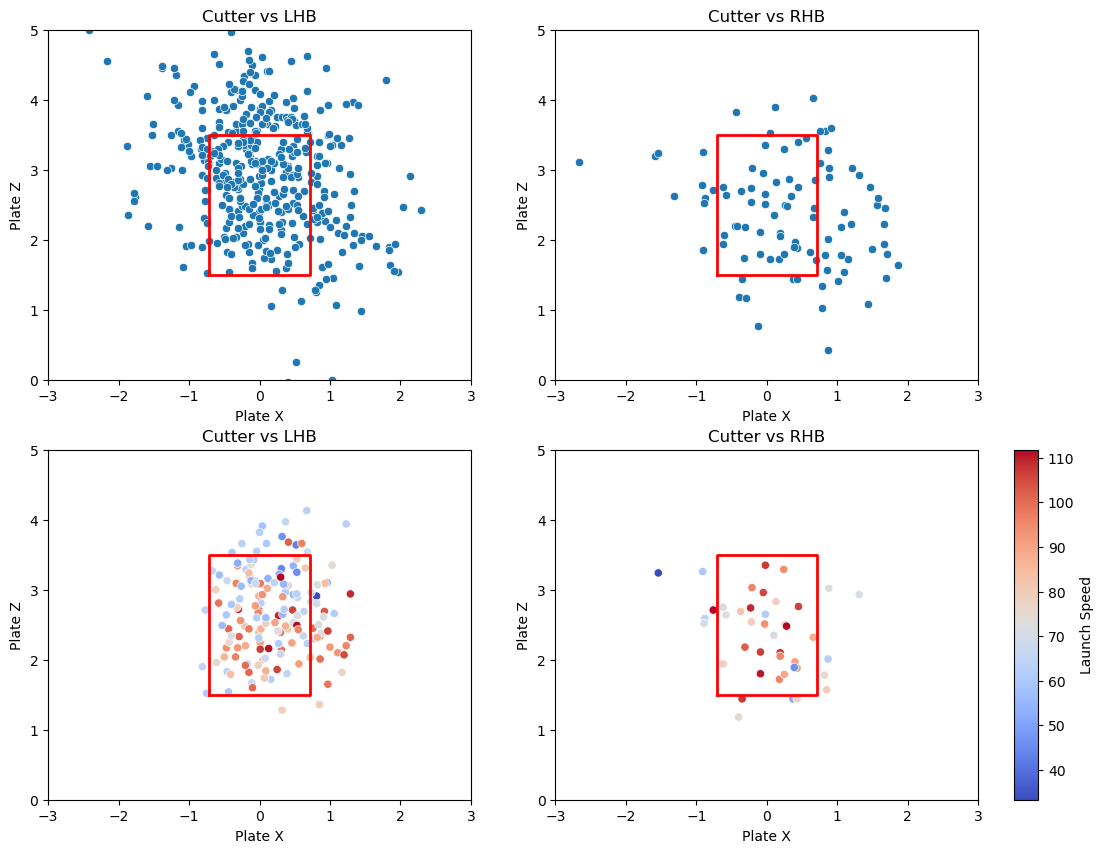

In [29]:
# Combine the data from both subplots to calculate the overall color scale
combined_cutter = pd.concat([cutter_l, cutter_r])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1 (top-left): Cutter vs LHB without launch_speed hue
sns.scatterplot(data=cutter_l, x="plate_x", y="plate_z", ax=axes[0, 0])
axes[0, 0].set_xlabel('Plate X')
axes[0, 0].set_ylabel('Plate Z')
axes[0, 0].set_title('Cutter vs LHB')

# Subplot 2 (top-right): Cutter vs RHB without launch_speed hue
sns.scatterplot(data=cutter_r, x="plate_x", y="plate_z", ax=axes[0, 1])
axes[0, 1].set_xlabel('Plate X')
axes[0, 1].set_ylabel('Plate Z')
axes[0, 1].set_title('Cutter vs RHB')

# Subplot 3 (bottom-left): Cutter vs LHB with launch_speed hue
sns.scatterplot(data=cutter_l, x="plate_x", y="plate_z", ax=axes[1, 0], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 0].set_xlabel('Plate X')
axes[1, 0].set_ylabel('Plate Z')
axes[1, 0].set_title('Cutter vs LHB')

# Subplot 4 (bottom-right): Cutter vs RHB with launch_speed hue
sns.scatterplot(data=cutter_r, x="plate_x", y="plate_z", ax=axes[1, 1], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 1].set_xlabel('Plate X')
axes[1, 1].set_ylabel('Plate Z')
axes[1, 1].set_title('Cutter vs RHB')

# Create a shared color bar for subplots 3 and 4
cbar_ax = fig.add_axes([0.93, 0.11, 0.02, 0.35])  # Adjust the position and size of the color bar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=combined_cutter["launch_speed"].min(), vmax=combined_cutter["launch_speed"].max()))
sm.set_array([])  
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Launch Speed")


for ax in axes.flatten():
    ax.plot([strike_zone_x_min, strike_zone_x_max, strike_zone_x_max, strike_zone_x_min, strike_zone_x_min],
            [strike_zone_y_min, strike_zone_y_min, strike_zone_y_max, strike_zone_y_max, strike_zone_y_min],
            color='r', linestyle='-', linewidth=2)
    ax.set_xlim([-3, 3])
    ax.set_ylim([0, 5])

Based on the information and figures above, it appears that right-handed batters do not exhibit a significant advantage when facing Gray's cutter, which may not justify the reduction in the number of cutters thrown to right-handed batters. The average exit velocity and swing-and-miss percentage are rather similar across LHBs and RHBs. The figure directly above shows that cutters to the outside are rather effective against all batters, whereas cutters aroud the middle of the plate, logically, are hit harder. Left-handed batters seem to excel against inside cutters. Perhaps Josiah Gray should throw more cutters to RHB, as removing a pitch, quite an effective one at that, from a pitcher's arsenal can only provide disadvantages.

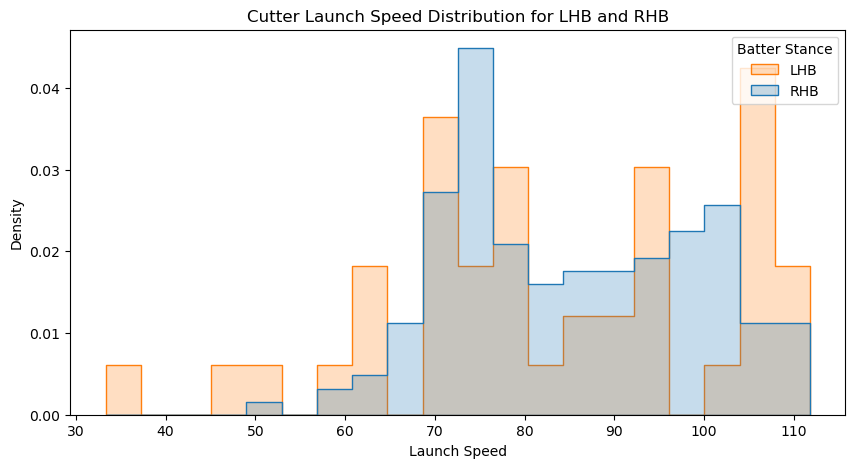

In [30]:
# Create a single histogram for both LHB and RHB
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(data=combined_cutter, x="launch_speed", hue="stand", element="step", common_norm=False, stat="density", bins=20)

# Customize the appearance
plt.xlabel('Launch Speed')
plt.ylabel('Density')
plt.title('Cutter Launch Speed Distribution for LHB and RHB')

# Show the legend
plt.legend(title='Batter Stance', labels=['LHB', 'RHB'])

# Show the plot
plt.show()


### Sinker performance by handedness

In [31]:
sinker_l = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "L") & (jg_2023_pitch_data["pitch_type"] == "Sinker")]
sinker_r = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "R") & (jg_2023_pitch_data["pitch_type"] == "Sinker")]
average_speeds = [sinker_l.launch_speed.mean(), sinker_r.launch_speed.mean()]
print(f"The average exit velocity against Josiah Gray's Sinker is {round(sinker_l.launch_speed.mean(), 2)} MPH for LHB and {round(sinker_r.launch_speed.mean(), 2)} MPH for RHB ")

The average exit velocity against Josiah Gray's Sinker is 81.64 MPH for LHB and 82.17 MPH for RHB 


In [32]:
sml_sinker = round(100 * (len(sinker_l[sinker_l["description"] == "swinging_strike"]) / len(sinker_l)), 2)
smr_sinker = round(100 * (len(sinker_r[sinker_r["description"] == "swinging_strike"]) / len(sinker_r)), 2)
print(f"The average swing and miss percentage against Josiah Gray's Sinker is {sml_sinker}% for LHB and {smr_sinker}% for RHB")

The average swing and miss percentage against Josiah Gray's Sinker is 6.61% for LHB and 5.25% for RHB


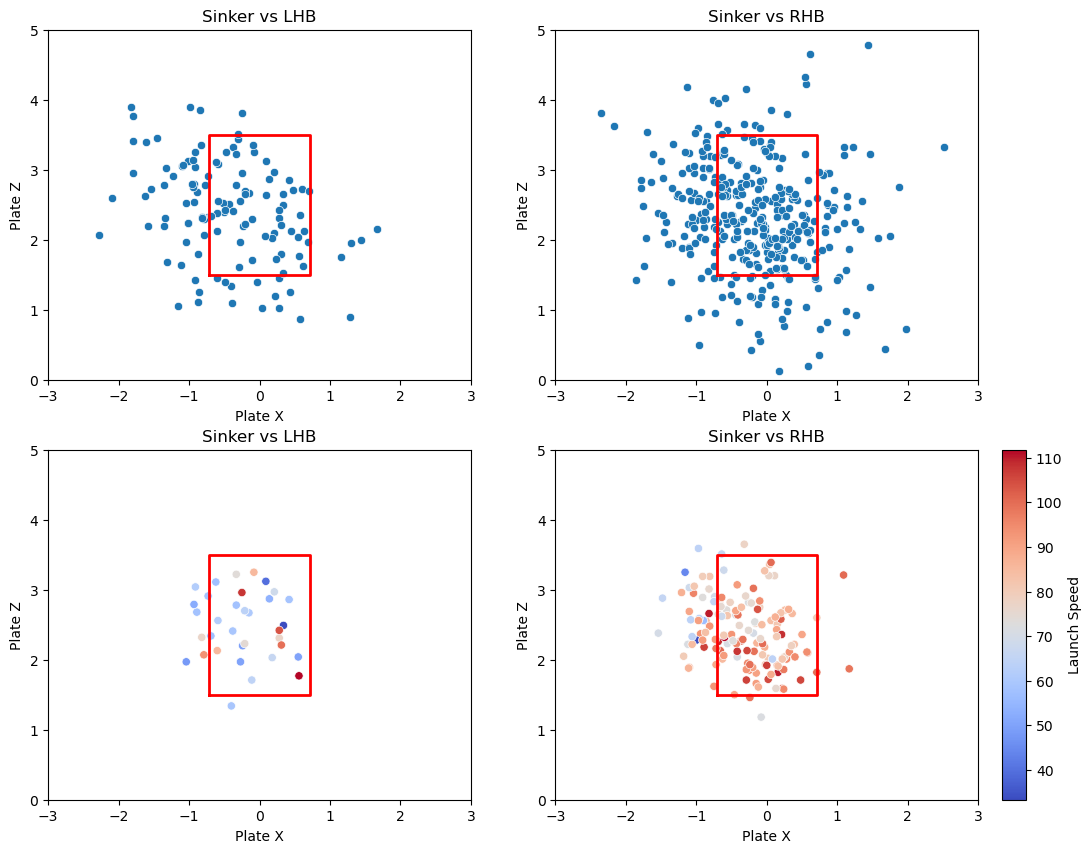

In [33]:
# Combine the data from both subplots to calculate the overall color scale
combined_sinker = pd.concat([sinker_l, sinker_r])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1 (top-left): Sinker vs LHB without launch_speed hue
sns.scatterplot(data=sinker_l, x="plate_x", y="plate_z", ax=axes[0, 0])
axes[0, 0].set_xlabel('Plate X')
axes[0, 0].set_ylabel('Plate Z')
axes[0, 0].set_title('Sinker vs LHB')

# Subplot 2 (top-right): Sinker vs RHB without launch_speed hue
sns.scatterplot(data=sinker_r, x="plate_x", y="plate_z", ax=axes[0, 1])
axes[0, 1].set_xlabel('Plate X')
axes[0, 1].set_ylabel('Plate Z')
axes[0, 1].set_title('Sinker vs RHB')

# Subplot 3 (bottom-left): Sinker vs LHB with launch_speed hue
sns.scatterplot(data=sinker_l, x="plate_x", y="plate_z", ax=axes[1, 0], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 0].set_xlabel('Plate X')
axes[1, 0].set_ylabel('Plate Z')
axes[1, 0].set_title('Sinker vs LHB')

# Subplot 4 (bottom-right): Sinker vs RHB with launch_speed hue
sns.scatterplot(data=sinker_r, x="plate_x", y="plate_z", ax=axes[1, 1], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 1].set_xlabel('Plate X')
axes[1, 1].set_ylabel('Plate Z')
axes[1, 1].set_title('Sinker vs RHB')

# Create a shared color bar for subplots 3 and 4
cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.35])  # Adjust the position and size of the color bar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=combined_cutter["launch_speed"].min(), vmax=combined_cutter["launch_speed"].max()))
sm.set_array([])  # An empty array is needed for the color bar to work
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Launch Speed")


for ax in axes.flatten():
    ax.plot([strike_zone_x_min, strike_zone_x_max, strike_zone_x_max, strike_zone_x_min, strike_zone_x_min],
            [strike_zone_y_min, strike_zone_y_min, strike_zone_y_max, strike_zone_y_max, strike_zone_y_min],
            color='r', linestyle='-', linewidth=2)
    ax.set_xlim([-3, 3])
    ax.set_ylim([0, 5])

Again, it does not seem as if the decrease in sinkers thrown to left-handed batters can quite be justified. Exit velocities and swing-and-miss percentages are similar.

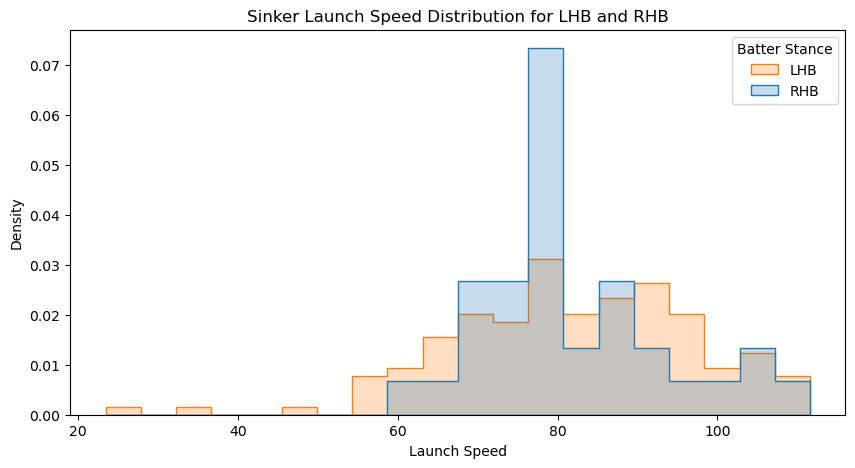

In [34]:
# Create a single histogram for both LHB and RHB
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(data=combined_sinker, x="launch_speed", hue="stand", element="step", common_norm=False, stat="density", bins=20)

# Customize the appearance
plt.xlabel('Launch Speed')
plt.ylabel('Density')
plt.title('Sinker Launch Speed Distribution for LHB and RHB')

# Show the legend
plt.legend(title='Batter Stance', labels=['LHB', 'RHB'])

In [35]:
sweeper_l = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "L") & (jg_2023_pitch_data["pitch_type"] == "Sweeper")]
sweeper_r = jg_2023_pitch_data[(jg_2023_pitch_data["stand"] == "R") & (jg_2023_pitch_data["pitch_type"] == "Sweeper")]
print(f"The average exit velocity against Josiah Gray's Sweeper is {round(sweeper_l.launch_speed.mean(), 2)} MPH for LHB and {round(sweeper_r.launch_speed.mean(), 2)} MPH for RHB ")

The average exit velocity against Josiah Gray's Sweeper is 95.27 MPH for LHB and 79.76 MPH for RHB 


In [36]:
sml_sweeper = round(100 * (len(sweeper_l[sweeper_l["description"] == "swinging_strike"]) / len(sweeper_l)), 2)
smr_sweeper = round(100 * (len(sweeper_r[sweeper_r["description"] == "swinging_strike"]) / len(sweeper_r)), 2)
print(f"The average swing and miss percentage against Josiah Gray's Sweeper is {sml_sweeper}% for LHB and {smr_sweeper}% for RHB")

The average swing and miss percentage against Josiah Gray's Sweeper is 11.76% for LHB and 19.42% for RHB


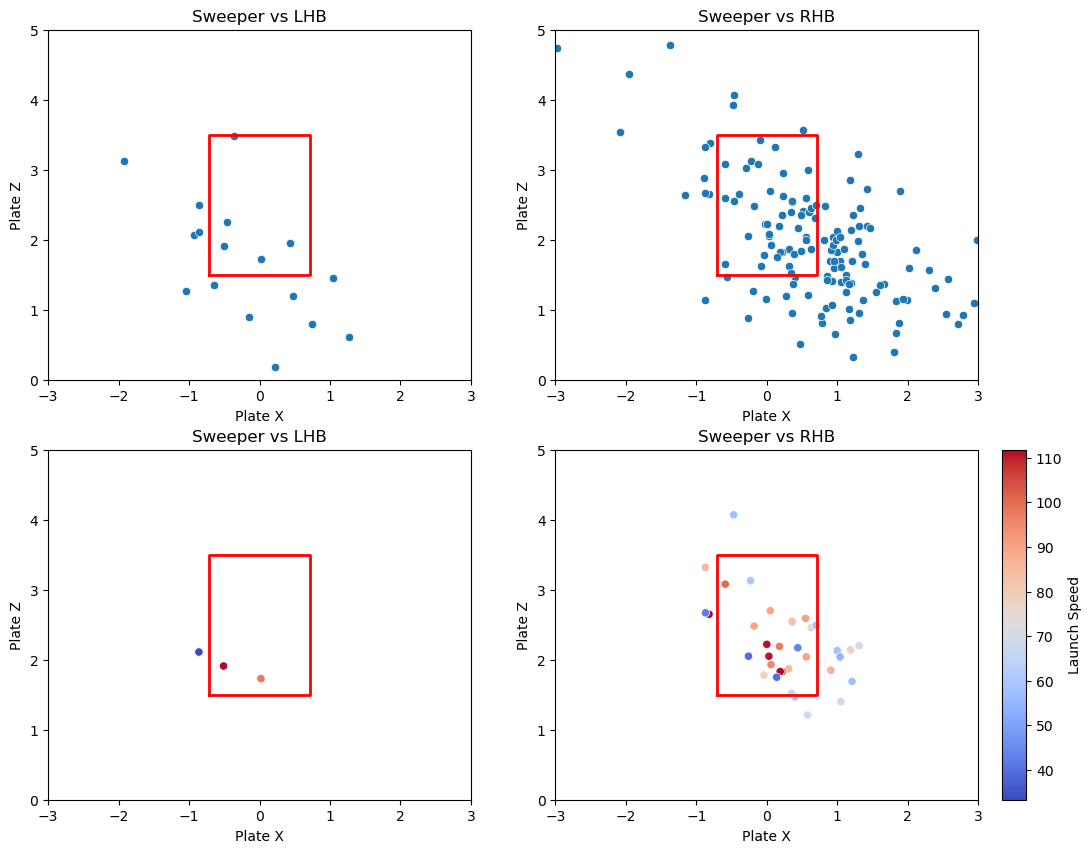

In [37]:
# Combine the data from both subplots to calculate the overall color scale
combined_sweeper = pd.concat([sweeper_l, sweeper_r])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1 (top-left): Sweeper vs LHB without launch_speed hue
sns.scatterplot(data=sweeper_l, x="plate_x", y="plate_z", ax=axes[0, 0])
axes[0, 0].set_xlabel('Plate X')
axes[0, 0].set_ylabel('Plate Z')
axes[0, 0].set_title('Sweeper vs LHB')

# Subplot 2 (top-right): Sweeper vs RHB without launch_speed hue
sns.scatterplot(data=sweeper_r, x="plate_x", y="plate_z", ax=axes[0, 1])
axes[0, 1].set_xlabel('Plate X')
axes[0, 1].set_ylabel('Plate Z')
axes[0, 1].set_title('Sweeper vs RHB')

# Subplot 3 (bottom-left): Sweeper vs LHB with launch_speed hue
sns.scatterplot(data=sweeper_l, x="plate_x", y="plate_z", ax=axes[1, 0], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 0].set_xlabel('Plate X')
axes[1, 0].set_ylabel('Plate Z')
axes[1, 0].set_title('Sweeper vs LHB')

# Subplot 4 (bottom-right): Sweeper vs RHB with launch_speed hue
sns.scatterplot(data=sweeper_r, x="plate_x", y="plate_z", ax=axes[1, 1], hue="launch_speed", palette="coolwarm", legend=False)
axes[1, 1].set_xlabel('Plate X')
axes[1, 1].set_ylabel('Plate Z')
axes[1, 1].set_title('Sweeper vs RHB')

# Create a shared color bar for subplots 3 and 4
cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.35])  # Adjust the position and size of the color bar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=combined_cutter["launch_speed"].min(), vmax=combined_cutter["launch_speed"].max()))
sm.set_array([])  # An empty array is needed for the color bar to work
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Launch Speed")


for ax in axes.flatten():
    ax.plot([strike_zone_x_min, strike_zone_x_max, strike_zone_x_max, strike_zone_x_min, strike_zone_x_min],
            [strike_zone_y_min, strike_zone_y_min, strike_zone_y_max, strike_zone_y_max, strike_zone_y_min],
            color='r', linestyle='-', linewidth=2)
    ax.set_xlim([-3, 3])
    ax.set_ylim([0, 5])

There is very limited exit velocity information for sweepers versus left-handed batters which skews the average. However, the swing-and-miss percentage is much higher for right-handed batters, leading me to believe that the pitch's effectiveness against right-handed batters is not necessarily replicated for left-handed batters.

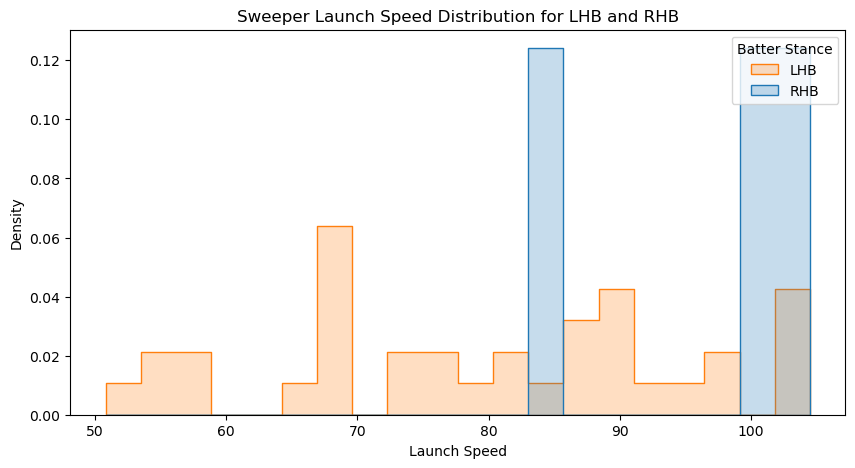

In [38]:
# Create a single histogram for both LHB and RHB
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(data=combined_sweeper, x="launch_speed", hue="stand", element="step", common_norm=False, stat="density", bins=20)

# Customize the appearance
plt.xlabel('Launch Speed')
plt.ylabel('Density')
plt.title('Sweeper Launch Speed Distribution for LHB and RHB')

# Show the legend
plt.legend(title='Batter Stance', labels=['LHB', 'RHB'])

## Pitch frequencies by count

Text(0.5, 1.0, 'Pitch Frequency per Count')

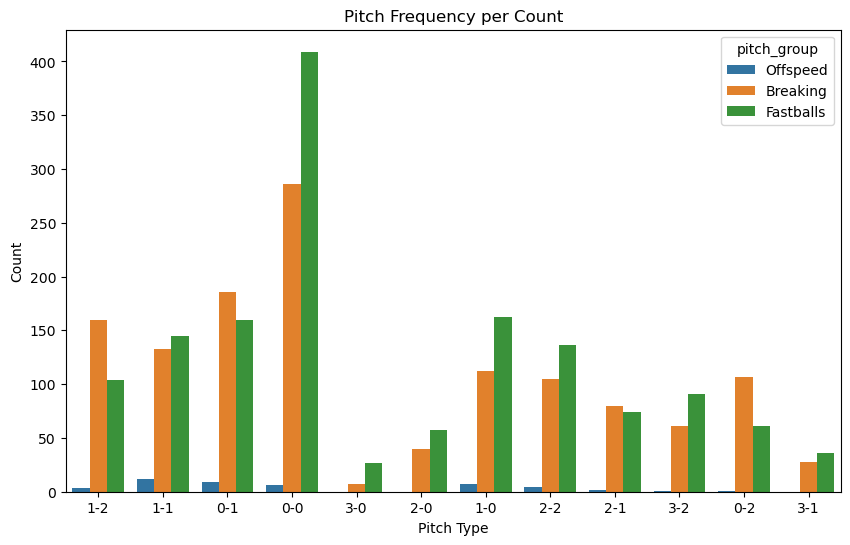

In [45]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.countplot(data=jg_2023_pitch_data, x="count", hue="pitch_group")
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.title('Pitch Frequency per Count')

In general Josiah Gray seems to do a good job of varying his pitch choice by count. He throws a first pitch fastball approximately 14.5% of the time, and the league average was 15.3% in 2023 (all of this data taken from [baseball savant](https://baseballsavant.mlb.com/)). However, he tends to throw breaking pitches whenever he is ahead in the count, as breaking pitches form the majority of pitches thrown in 0-1, 0-2, and 1-2 counts. His breaking pitch percentage for these three counts are 52%, 63%, and 60% respectively. The league average in these three counts are 33%, 40%, and 39% respectively. There is a rather clear difference between Gray's breaking pitch usage when ahead in the count versus the league's usage. Perhaps this helps to confirm a previous point made regarding Gray's offspeed pitch usage. Throwing the changeup more often would help alleviate the disparity between Gray's breaking pitch usage while ahead in the count versus the league's usage.

Personally, when watching Josiah Gray pitch this year (not every single start, but as many as I could), I noticed that he struggled to put hitters away. Batters would foul off a lot of pitches, causing more pitches to be thrown and obviously more fatigue. I wanted to see whether this was a genuine phenomena or just personal bias. When ahead in the count Josiah Gray has a strikeout percentage of 20% and the league's percentage was 21%. I also wanted to compare his outcomes of specifically 0-2 breaking pitches.

In [46]:
league_dict = {
    "event": ["ball", "hit_into_play", "swinging_strike", "called_strike", "foul", "hit_by_pitch", "swinging_strike_blocked", "foul_tip"],
    "count": [9008, 3484, 3098, 496, 3041, 82, 759, 156]}
league_2023_0_2_breaking_outcomes = pd.DataFrame(league_dict)
league_2023_0_2_breaking_outcomes["percentage"] = league_2023_0_2_breaking_outcomes["count"] / league_2023_0_2_breaking_outcomes["count"].sum()

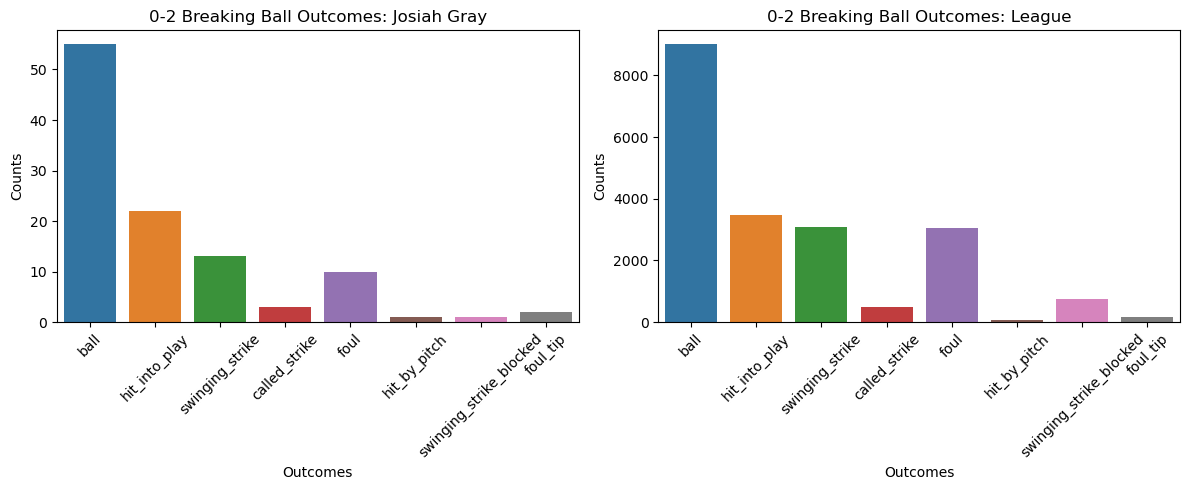

In [47]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=jg_2023_pitch_data[(jg_2023_pitch_data["count"] == "0-2") & (jg_2023_pitch_data["pitch_group"] == "Breaking")], x="description", ax=ax0)
ax0.set_xlabel('Outcomes')
ax0.set_ylabel('Counts')
ax0.set_title('0-2 Breaking Ball Outcomes: Josiah Gray')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
sns.barplot(data=league_2023_0_2_breaking_outcomes, x="event", y="count", ax=ax1)
ax1.set_xlabel('Outcomes')
ax1.set_ylabel('Counts')
ax1.set_title('0-2 Breaking Ball Outcomes: League')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.tight_layout()

There is no real disparity.

## Pitching when runners are one base

In [48]:
no_runner = jg_2023_pitch_data[jg_2023_pitch_data['on_1b'].isna() & jg_2023_pitch_data['on_2b'].isna() & jg_2023_pitch_data['on_3b'].isna()]
runner_on_first = jg_2023_pitch_data[~jg_2023_pitch_data['on_1b'].isna() & jg_2023_pitch_data['on_2b'].isna() & jg_2023_pitch_data['on_3b'].isna()]
runner_on_second = jg_2023_pitch_data[jg_2023_pitch_data['on_1b'].isna() & ~jg_2023_pitch_data['on_2b'].isna() & jg_2023_pitch_data['on_3b'].isna()]
runner_on_third = jg_2023_pitch_data[jg_2023_pitch_data['on_1b'].isna() & jg_2023_pitch_data['on_2b'].isna() & ~jg_2023_pitch_data['on_3b'].isna()]
runner_on_first_and_second = jg_2023_pitch_data[~jg_2023_pitch_data['on_1b'].isna() & ~jg_2023_pitch_data['on_2b'].isna() & jg_2023_pitch_data['on_3b'].isna()]
runner_on_first_and_third = jg_2023_pitch_data[~jg_2023_pitch_data['on_1b'].isna() & jg_2023_pitch_data['on_2b'].isna() & ~jg_2023_pitch_data['on_3b'].isna()]
runner_on_second_and_third = jg_2023_pitch_data[jg_2023_pitch_data['on_1b'].isna() & ~jg_2023_pitch_data['on_2b'].isna() & ~jg_2023_pitch_data['on_3b'].isna()]
bases_loaded = jg_2023_pitch_data[~jg_2023_pitch_data['on_1b'].isna() & ~jg_2023_pitch_data['on_2b'].isna() & ~jg_2023_pitch_data['on_3b'].isna()]

#### Plot of pitch types by the runners on base by batter handedness

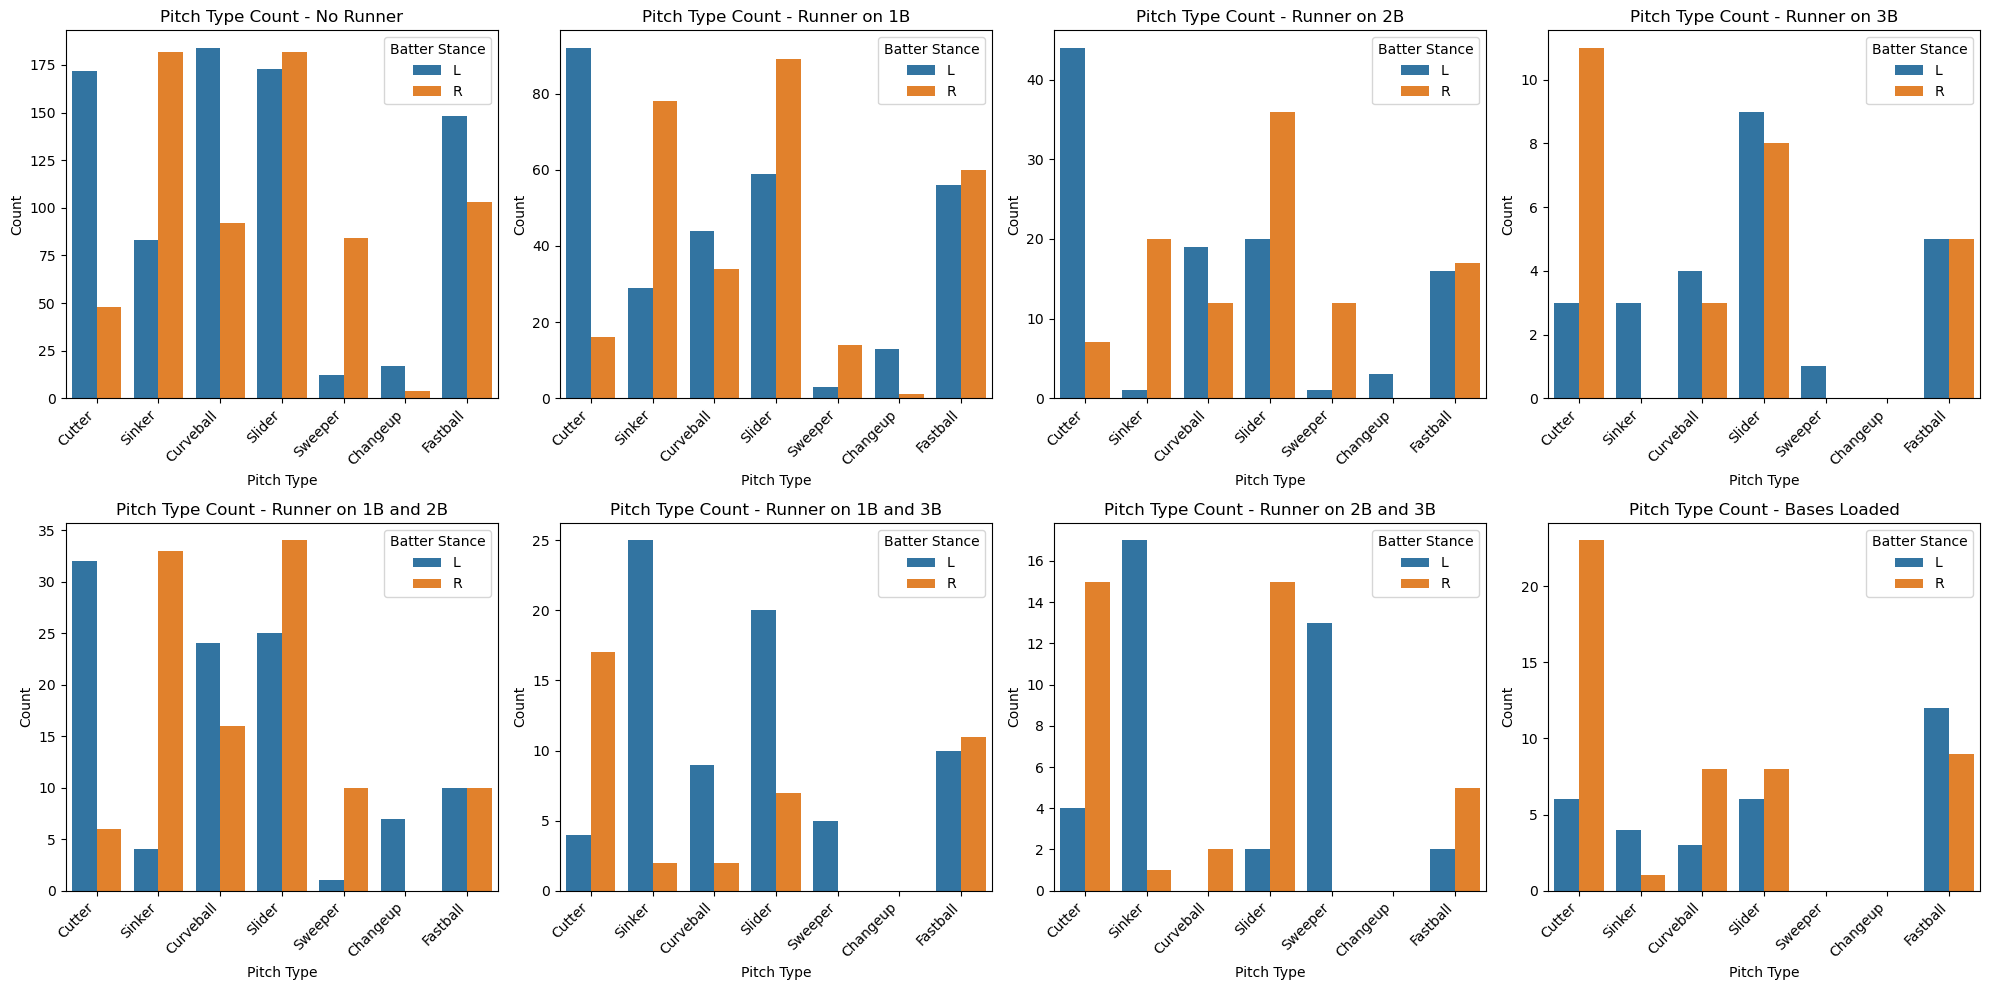

In [49]:
situations = [no_runner, runner_on_first, runner_on_second, runner_on_third, runner_on_first_and_second, runner_on_first_and_third, runner_on_second_and_third, bases_loaded]
situation_labels = ["No Runner", "Runner on 1B", "Runner on 2B", "Runner on 3B", "Runner on 1B and 2B", "Runner on 1B and 3B", "Runner on 2B and 3B", "Bases Loaded"]


fig, axes = plt.subplots(2, 4, figsize=(20, 10))


common_pitch_order = no_runner['pitch_type'].unique()

# Loop through the base occupancy scenarios and plot pitch type count with hue
for i, situation_df in enumerate(situations):
    row, col = i // 4, i % 4
    ax = axes[row, col]

    # Plot pitch type count with hue for batter stance (stand) and specify the common order
    sns.countplot(data=situation_df, x="pitch_type", hue="stand", order=common_pitch_order, ax=ax)

    # Set labels, title, and adjust legend position
    ax.set_xlabel("Pitch Type")
    ax.set_ylabel("Count")
    ax.set_title(f"Pitch Type Count - {situation_labels[i]}")

    # Angle x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Move legend to the top right
    ax.legend(title="Batter Stance", labels=["L", "R"], loc='upper right')

# Adjust the layout
plt.tight_layout()



There is an uptick in cutters thrown to RHB (relative to LHB) whenever there is a runner on 3rd base. This is of course logical as the aim is to get the ball to the left side of the infield, but is something that can be picked up on.

#### Plot of pitch types by the runners on base by number of outs

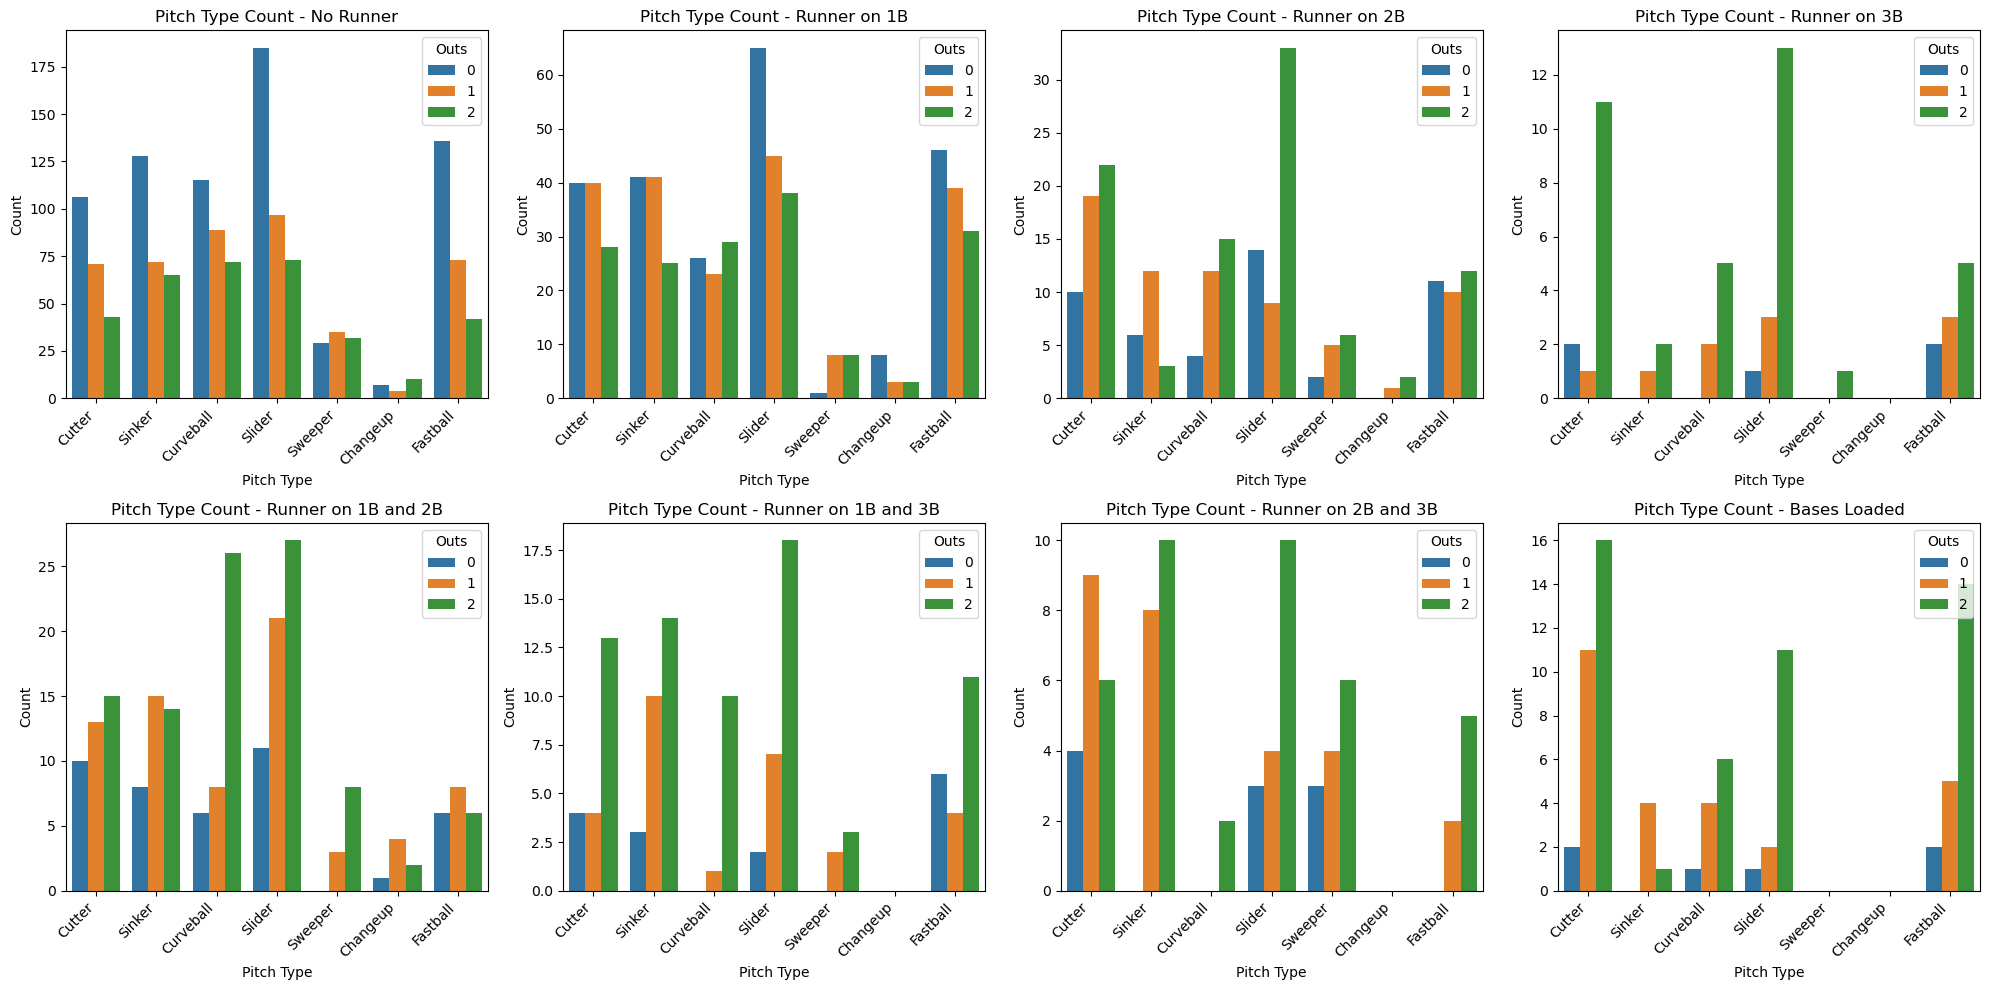

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))


common_pitch_order = no_runner['pitch_type'].unique()

# Loop through the base occupancy scenarios and plot pitch type count with hue
for i, situation_df in enumerate(situations):
    row, col = i // 4, i % 4
    ax = axes[row, col]

    # Plot pitch type count with hue for batter stance (stand) and specify the common order
    sns.countplot(data=situation_df, x="pitch_type", hue="outs_when_up", order=common_pitch_order, ax=ax)

    # Set labels, title, and adjust legend position
    ax.set_xlabel("Pitch Type")
    ax.set_ylabel("Count")
    ax.set_title(f"Pitch Type Count - {situation_labels[i]}")

    # Angle x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Move legend to the top right
    ax.legend(title="Outs", labels=["0", "1", "2"], loc='upper right')

# Adjust the layout
plt.tight_layout()



The slider is thrown a lot more often when there are 2 outs whenever a runner is on. The curveball also seems to exhibit this trend. 

# Conclusion

This rather swift analysis of Josiah Gray's 2023 season was not meant to be incredibly deep and complicated. I mainly wanted to practice my visualization skills as well as some intution behind pitcher analysis. If there was anything to aid Gray's performance, it would be the development of a solid changeup, and to not be afraid of throwing the cutter and sinker to either handed batters.